In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from math import sqrt
import math
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv("Concrete_Data_fix.csv")

# seperate to X and y
X=df.drop(["CCStr"],axis=1)
y=df["CCStr"]

df.head()

,Cement,Slag,Fly_Ash,Water,Superplastic,Coarse_Aggr,Fine_Aggr,Age,CCStr
0,540.0,1,1,162.0,2.5,1040.0,676.0,2,79.99
1,540.0,1,1,162.0,2.5,1055.0,676.0,2,61.89
2,332.5,3,1,228.0,0.0,932.0,594.0,5,40.27
3,332.5,3,1,228.0,0.0,932.0,594.0,5,41.05
4,198.6,3,1,192.0,0.0,978.4,825.5,5,44.30


In [3]:
# import methods
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fitting models on Training data 
    lr.fit(X_train, y_train) 
    lasso.fit(X_train, y_train) 
    ridge.fit(X_train, y_train) 
    enet.fit(X_train, y_train) 

    # training and testing with different models and different categorical feature handling methods
    y_pred_lr = lr.predict(X_test) 
    y_pred_lasso = lasso.predict(X_test) 
    y_pred_ridge = ridge.predict(X_test)
    y_pred_enet = enet.predict(X_test)

    list1.append(np.sqrt(mean_squared_error(y_test, y_pred_lr)))
    list2.append(r2_score(y_test, y_pred_lr))
    list3.append(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
    list4.append(r2_score(y_test, y_pred_lasso))
    list5.append(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
    list6.append(r2_score(y_test, y_pred_ridge))
    list7.append(np.sqrt(mean_squared_error(y_test, y_pred_enet)))
    list8.append(r2_score(y_test, y_pred_enet))
    
# print("Model\t\t   RMSE \t  R2") 
# print("Linear Regression  {:.4f} \t{:.4f}".format(list1[2], list2[2])) 
# print("Lasso Regression   {:.4f} \t{:.4f}".format(list3[2], list4[2]))
# print("Ridge Regression   {:.4f} \t{:.4f}".format(list5[2], list6[2]))
# print("Enet Regression    {:.4f} \t{:.4f}".format(list7[2], list8[2]))
print("Finish!!")

Finish!!


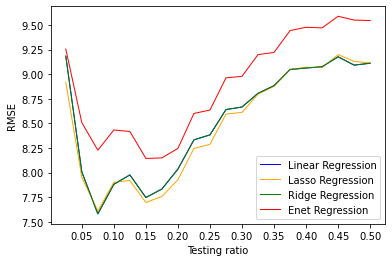

In [7]:
plt.plot(ratio, list1, lw=1, c='blue', label='Linear Regression')  # plot y1
plt.plot(ratio, list3, lw=1, c='orange', label='Lasso Regression')  # plot y2
plt.plot(ratio, list5, lw=1, c='green', label='Ridge Regression')  # plot y3
plt.plot(ratio, list7, lw=1, c='red', label='Enet Regression')  # plot y4

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])  # x軸刻度
plt.xlabel('Testing ratio')  # x軸名字
plt.ylabel('RMSE')  # y軸名字
plt.legend()
plt.show()

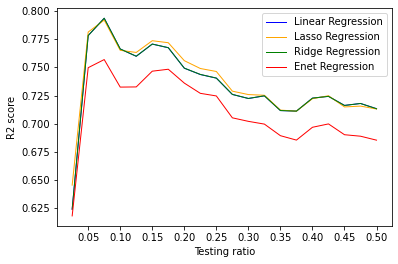

In [8]:
plt.plot(ratio, list2, lw=1, c='blue', ms=4, label='Linear Regression')  # plot y1
plt.plot(ratio, list4, lw=1, c='orange', label='Lasso Regression')  # plot y2
plt.plot(ratio, list6, lw=1, c='green', label='Ridge Regression')  # plot y3
plt.plot(ratio, list8, lw=1, c='red', label='Enet Regression')  # plot y4

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])  # x軸刻度
plt.xlabel('Testing ratio')  # x軸名字
plt.ylabel('R2 score')  # y軸名字
plt.legend()
plt.show()

In [6]:
# import methods
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data 
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train) 
enet.fit(X_train, y_train) 

# training and testing with different models and different categorical feature handling methods
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test)
y_pred_enet = enet.predict(X_test)
    
print("Model\t\t    RMSE \t  R2") 
print("Linear Regression  {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr))) 
print("Lasso Regression   {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso)))
print("Ridge Regression   {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)))
print("Enet Regression    {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_enet)), r2_score(y_test, y_pred_enet)))

Model		    RMSE 	  R2
Linear Regression  7.7477	0.7708
Lasso Regression   7.6966	0.7738
Ridge Regression   7.7468	0.7708
Enet Regression    8.1443	0.7467


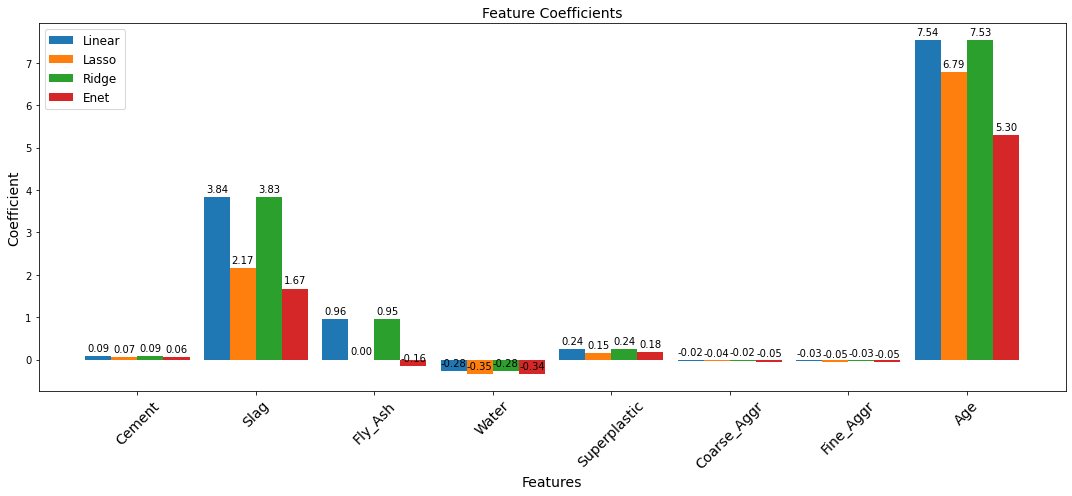

In [7]:
coeff_lr = lr.coef_ 
coeff_lasso = lasso.coef_ 
coeff_ridge = ridge.coef_ 
coeff_enet = enet.coef_

labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.22
fig, ax = plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - 3*(width/2), coeff_lr, width, label='Linear') 
rects2 = ax.bar(x - 1*(width/2), coeff_lasso, width, label='Lasso') 
rects3 = ax.bar(x + 1*(width/2), coeff_ridge, width, label='Ridge') 
rects4 = ax.bar(x + 3*(width/2), coeff_enet, width, label='Enet') 
ax.set_ylabel('Coefficient', fontsize = 14) 
ax.set_xlabel('Features', fontsize = 14) 
ax.set_title('Feature Coefficients', fontsize = 14) 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45, fontsize = 14) 
ax.legend(loc=2, fontsize = 12) 
def autolabel(rects): 
    """Attach a text label above each bar in *rects*, displaying its height.""" 
    for rect in rects: 
        height = rect.get_height() 
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom') 
autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3)
autolabel(rects4)
fig.tight_layout() 
plt.show()

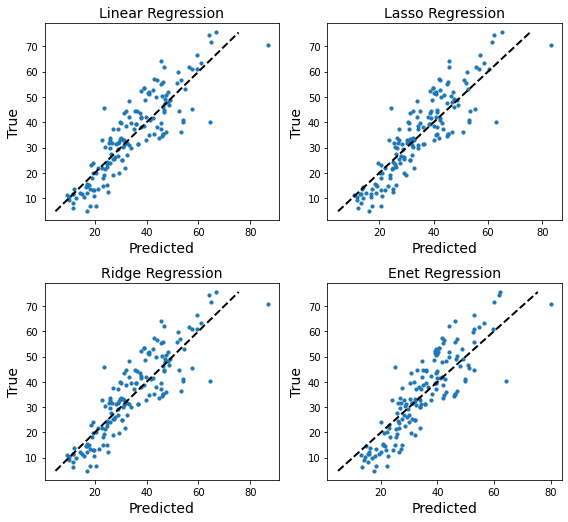

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_lr, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("Linear Regression", fontsize = 14) 

ax2.scatter(y_pred_lasso, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("Lasso Regression", fontsize = 14) 

ax3.scatter(y_pred_ridge, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("Ridge Regression", fontsize = 14) 

ax4.scatter(y_pred_enet, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("Enet Regression", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [9]:
# import methods
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
mlp = MLPRegressor(max_iter=1000)
svm = SVR()

list9=[]
list10=[]
list11=[]
list12=[]
list13=[]
list14=[]
list15=[]
list16=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) 
    
    # Fitting models on Training data
    dtr.fit(X_train, y_train) 
    knn.fit(X_train, y_train) 
    mlp.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    
    # training and testing with different models and different categorical feature handling methods
    y_pred_dtr = dtr.predict(X_test) 
    y_pred_knn = knn.predict(X_test)
    y_pred_mlp = mlp.predict(X_test)
    y_pred_svm = svm.predict(X_test)
    
    list9.append(np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
    list10.append(r2_score(y_test, y_pred_dtr))
    list11.append(np.sqrt(mean_squared_error(y_test, y_pred_knn)))
    list12.append(r2_score(y_test, y_pred_knn))
    list13.append(np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
    list14.append(r2_score(y_test, y_pred_mlp))
    list15.append(np.sqrt(mean_squared_error(y_test, y_pred_svm)))
    list16.append(r2_score(y_test, y_pred_svm))
    
print("Finish!!")

Finish!!


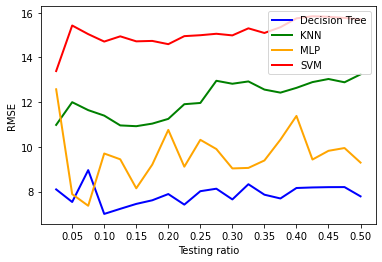

In [64]:
plt.plot(ratio, list9,  lw=2, c='blue', label='Decision Tree')
plt.plot(ratio, list11, lw=2, c='green', label='KNN')
plt.plot(ratio, list13, lw=2, c='orange', label='MLP')
plt.plot(ratio, list15, lw=2, c='red', label='SVM')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('RMSE')
plt.legend(loc=1)
plt.show()

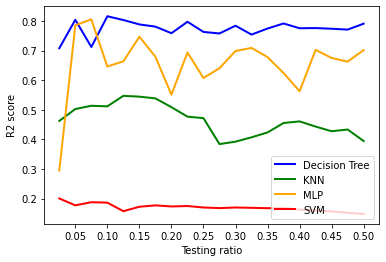

In [65]:
plt.plot(ratio, list10,  lw=2, c='blue', label='Decision Tree')
plt.plot(ratio, list12, lw=2, c='green', label='KNN')
plt.plot(ratio, list14, lw=2, c='orange', label='MLP')
plt.plot(ratio, list16, lw=2, c='red', label='SVM')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('R2 score')
plt.legend(loc=4)
plt.show()

In [12]:
# import methods
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
mlp = MLPRegressor(max_iter=1000)
svm = SVR()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data
dtr.fit(X_train, y_train) 
knn.fit(X_train, y_train) 
mlp.fit(X_train, y_train)
svm.fit(X_train, y_train)
    
# training and testing with different models and different categorical feature handling methods
y_pred_dtr = dtr.predict(X_test) 
y_pred_knn = knn.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_svm = svm.predict(X_test)
    
print("Model\t\t RMSE \t   R2") 
print("Decision Tree   {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_dtr)), r2_score(y_test, y_pred_dtr))) 
print("KNN Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_knn)), r2_score(y_test, y_pred_knn)))
print("MLP Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_mlp)), r2_score(y_test, y_pred_mlp)))
print("SVM Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_svm)), r2_score(y_test, y_pred_svm)))

Model		 RMSE 	   R2
Decision Tree   7.3588	 0.7932
KNN Regression  10.9242	 0.5442
MLP Regression  7.8351	 0.7656
SVM Regression  14.7213	 0.1723


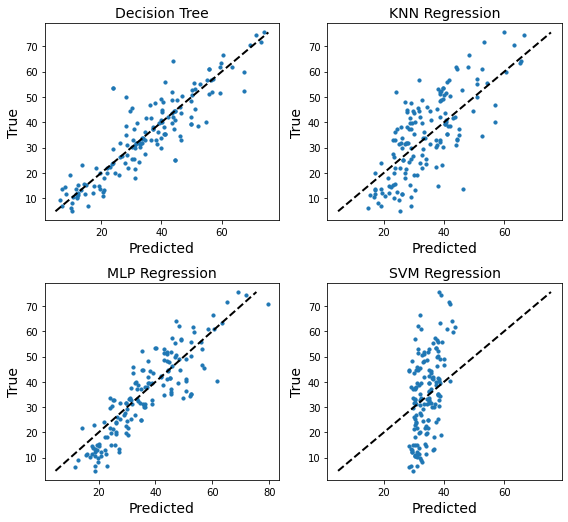

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_dtr, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("Decision Tree", fontsize = 14) 

ax2.scatter(y_pred_knn, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("KNN Regression", fontsize = 14) 

ax3.scatter(y_pred_mlp, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("MLP Regression", fontsize = 14) 

ax4.scatter(y_pred_svm, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("SVM Regression", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [14]:
# import methods
lgbm = LGBMRegressor()
xgb = XGBRegressor()
cat = CatBoostRegressor()
rdf = RandomForestRegressor()

list17=[]
list18=[]
list19=[]
list20=[]
list21=[]
list22=[]
list23=[]
list24=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) 
    
    # Fitting models on Training data
    lgbm.fit(X_train, y_train) 
    xgb.fit(X_train, y_train) 
    cat.fit(X_train, y_train) 
    rdf.fit(X_train, y_train)
    
    # training and testing with different models and different categorical feature handling methods
    y_pred_lgbm=lgbm.predict(X_test)
    y_pred_xgb = xgb.predict(X_test)
    y_pred_cat = cat.predict(X_test)
    y_pred_rdf = rdf.predict(X_test)
    
    list17.append(np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
    list18.append(r2_score(y_test, y_pred_lgbm))
    list19.append(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
    list20.append(r2_score(y_test, y_pred_xgb))
    list21.append(np.sqrt(mean_squared_error(y_test, y_pred_cat)))
    list22.append(r2_score(y_test, y_pred_cat))
    list23.append(np.sqrt(mean_squared_error(y_test, y_pred_rdf)))
    list24.append(r2_score(y_test, y_pred_rdf))

print("Finish!!")    

Learning rate set to 0.040969
0:	learn: 16.3176491	total: 146ms	remaining: 2m 25s
1:	learn: 15.8973107	total: 146ms	remaining: 1m 13s
2:	learn: 15.5348359	total: 147ms	remaining: 49s
3:	learn: 15.1489730	total: 148ms	remaining: 36.9s
4:	learn: 14.7957711	total: 150ms	remaining: 29.8s
5:	learn: 14.4245430	total: 150ms	remaining: 24.9s
6:	learn: 14.1067403	total: 151ms	remaining: 21.5s
7:	learn: 13.7514431	total: 152ms	remaining: 18.9s
8:	learn: 13.4151224	total: 153ms	remaining: 16.9s
9:	learn: 13.1012633	total: 154ms	remaining: 15.2s
10:	learn: 12.8091180	total: 155ms	remaining: 13.9s
11:	learn: 12.5491526	total: 156ms	remaining: 12.8s
12:	learn: 12.3050688	total: 157ms	remaining: 11.9s
13:	learn: 12.0483598	total: 158ms	remaining: 11.1s
14:	learn: 11.7919327	total: 158ms	remaining: 10.4s
15:	learn: 11.5779255	total: 159ms	remaining: 9.79s
16:	learn: 11.3347491	total: 160ms	remaining: 9.26s
17:	learn: 11.1106161	total: 161ms	remaining: 8.78s
18:	learn: 10.8841230	total: 162ms	remaining

243:	learn: 4.2401949	total: 344ms	remaining: 1.06s
244:	learn: 4.2322806	total: 345ms	remaining: 1.06s
245:	learn: 4.2248162	total: 346ms	remaining: 1.06s
246:	learn: 4.2201018	total: 346ms	remaining: 1.05s
247:	learn: 4.2137124	total: 347ms	remaining: 1.05s
248:	learn: 4.2081015	total: 348ms	remaining: 1.05s
249:	learn: 4.2049452	total: 349ms	remaining: 1.05s
250:	learn: 4.1994162	total: 350ms	remaining: 1.04s
251:	learn: 4.1944550	total: 350ms	remaining: 1.04s
252:	learn: 4.1895952	total: 351ms	remaining: 1.04s
253:	learn: 4.1864607	total: 352ms	remaining: 1.03s
254:	learn: 4.1844379	total: 353ms	remaining: 1.03s
255:	learn: 4.1791194	total: 354ms	remaining: 1.03s
256:	learn: 4.1740715	total: 354ms	remaining: 1.02s
257:	learn: 4.1683671	total: 355ms	remaining: 1.02s
258:	learn: 4.1654943	total: 356ms	remaining: 1.02s
259:	learn: 4.1607602	total: 357ms	remaining: 1.02s
260:	learn: 4.1563515	total: 358ms	remaining: 1.01s
261:	learn: 4.1538558	total: 359ms	remaining: 1.01s
262:	learn: 

458:	learn: 3.5611684	total: 517ms	remaining: 609ms
459:	learn: 3.5592495	total: 518ms	remaining: 608ms
460:	learn: 3.5579838	total: 518ms	remaining: 606ms
461:	learn: 3.5561512	total: 519ms	remaining: 605ms
462:	learn: 3.5540469	total: 520ms	remaining: 603ms
463:	learn: 3.5515315	total: 521ms	remaining: 602ms
464:	learn: 3.5501413	total: 522ms	remaining: 600ms
465:	learn: 3.5492186	total: 523ms	remaining: 599ms
466:	learn: 3.5472581	total: 524ms	remaining: 598ms
467:	learn: 3.5455334	total: 524ms	remaining: 596ms
468:	learn: 3.5440321	total: 525ms	remaining: 595ms
469:	learn: 3.5421761	total: 526ms	remaining: 593ms
470:	learn: 3.5400088	total: 527ms	remaining: 592ms
471:	learn: 3.5367619	total: 528ms	remaining: 591ms
472:	learn: 3.5343279	total: 529ms	remaining: 589ms
473:	learn: 3.5321033	total: 530ms	remaining: 588ms
474:	learn: 3.5306060	total: 531ms	remaining: 587ms
475:	learn: 3.5280593	total: 532ms	remaining: 585ms
476:	learn: 3.5273389	total: 532ms	remaining: 584ms
477:	learn: 

677:	learn: 3.2360854	total: 689ms	remaining: 327ms
678:	learn: 3.2343756	total: 690ms	remaining: 326ms
679:	learn: 3.2329391	total: 691ms	remaining: 325ms
680:	learn: 3.2320075	total: 692ms	remaining: 324ms
681:	learn: 3.2309451	total: 692ms	remaining: 323ms
682:	learn: 3.2300404	total: 693ms	remaining: 322ms
683:	learn: 3.2291955	total: 694ms	remaining: 321ms
684:	learn: 3.2282703	total: 695ms	remaining: 319ms
685:	learn: 3.2276238	total: 695ms	remaining: 318ms
686:	learn: 3.2264516	total: 696ms	remaining: 317ms
687:	learn: 3.2260670	total: 697ms	remaining: 316ms
688:	learn: 3.2250303	total: 698ms	remaining: 315ms
689:	learn: 3.2244490	total: 698ms	remaining: 314ms
690:	learn: 3.2235171	total: 699ms	remaining: 313ms
691:	learn: 3.2223407	total: 700ms	remaining: 312ms
692:	learn: 3.2211941	total: 701ms	remaining: 310ms
693:	learn: 3.2198198	total: 702ms	remaining: 309ms
694:	learn: 3.2184805	total: 702ms	remaining: 308ms
695:	learn: 3.2172705	total: 703ms	remaining: 307ms
696:	learn: 

885:	learn: 3.0715609	total: 862ms	remaining: 111ms
886:	learn: 3.0712354	total: 863ms	remaining: 110ms
887:	learn: 3.0703975	total: 864ms	remaining: 109ms
888:	learn: 3.0702328	total: 865ms	remaining: 108ms
889:	learn: 3.0698642	total: 866ms	remaining: 107ms
890:	learn: 3.0693373	total: 866ms	remaining: 106ms
891:	learn: 3.0686490	total: 867ms	remaining: 105ms
892:	learn: 3.0679569	total: 868ms	remaining: 104ms
893:	learn: 3.0673260	total: 869ms	remaining: 103ms
894:	learn: 3.0669162	total: 869ms	remaining: 102ms
895:	learn: 3.0667492	total: 870ms	remaining: 101ms
896:	learn: 3.0661397	total: 871ms	remaining: 100ms
897:	learn: 3.0655274	total: 872ms	remaining: 99ms
898:	learn: 3.0653488	total: 873ms	remaining: 98.1ms
899:	learn: 3.0647988	total: 874ms	remaining: 97.1ms
900:	learn: 3.0641821	total: 875ms	remaining: 96.1ms
901:	learn: 3.0641601	total: 875ms	remaining: 95.1ms
902:	learn: 3.0640602	total: 876ms	remaining: 94.1ms
903:	learn: 3.0638290	total: 877ms	remaining: 93.1ms
904:	le

194:	learn: 4.5704926	total: 161ms	remaining: 666ms
195:	learn: 4.5645550	total: 162ms	remaining: 665ms
196:	learn: 4.5589148	total: 163ms	remaining: 664ms
197:	learn: 4.5521817	total: 164ms	remaining: 663ms
198:	learn: 4.5464549	total: 165ms	remaining: 662ms
199:	learn: 4.5384185	total: 165ms	remaining: 661ms
200:	learn: 4.5331150	total: 166ms	remaining: 660ms
201:	learn: 4.5256997	total: 167ms	remaining: 659ms
202:	learn: 4.5201848	total: 168ms	remaining: 658ms
203:	learn: 4.5139961	total: 168ms	remaining: 657ms
204:	learn: 4.5102620	total: 169ms	remaining: 656ms
205:	learn: 4.5020337	total: 170ms	remaining: 655ms
206:	learn: 4.4969307	total: 171ms	remaining: 654ms
207:	learn: 4.4890639	total: 171ms	remaining: 653ms
208:	learn: 4.4855029	total: 172ms	remaining: 652ms
209:	learn: 4.4796427	total: 175ms	remaining: 657ms
210:	learn: 4.4752187	total: 176ms	remaining: 659ms
211:	learn: 4.4731899	total: 177ms	remaining: 658ms
212:	learn: 4.4640350	total: 178ms	remaining: 657ms
213:	learn: 

417:	learn: 3.7022706	total: 333ms	remaining: 463ms
418:	learn: 3.7011215	total: 333ms	remaining: 462ms
419:	learn: 3.6983411	total: 334ms	remaining: 462ms
420:	learn: 3.6958175	total: 335ms	remaining: 461ms
421:	learn: 3.6939756	total: 336ms	remaining: 460ms
422:	learn: 3.6924090	total: 337ms	remaining: 459ms
423:	learn: 3.6898388	total: 338ms	remaining: 459ms
424:	learn: 3.6877725	total: 338ms	remaining: 458ms
425:	learn: 3.6869511	total: 339ms	remaining: 457ms
426:	learn: 3.6860574	total: 340ms	remaining: 456ms
427:	learn: 3.6843210	total: 341ms	remaining: 455ms
428:	learn: 3.6816056	total: 342ms	remaining: 455ms
429:	learn: 3.6774842	total: 342ms	remaining: 454ms
430:	learn: 3.6760827	total: 343ms	remaining: 453ms
431:	learn: 3.6747190	total: 344ms	remaining: 452ms
432:	learn: 3.6718298	total: 345ms	remaining: 452ms
433:	learn: 3.6696487	total: 346ms	remaining: 451ms
434:	learn: 3.6670361	total: 346ms	remaining: 450ms
435:	learn: 3.6650324	total: 347ms	remaining: 449ms
436:	learn: 

640:	learn: 3.3223561	total: 504ms	remaining: 282ms
641:	learn: 3.3209453	total: 504ms	remaining: 281ms
642:	learn: 3.3195744	total: 505ms	remaining: 280ms
643:	learn: 3.3187311	total: 506ms	remaining: 280ms
644:	learn: 3.3176860	total: 507ms	remaining: 279ms
645:	learn: 3.3163197	total: 507ms	remaining: 278ms
646:	learn: 3.3158452	total: 508ms	remaining: 277ms
647:	learn: 3.3153720	total: 509ms	remaining: 276ms
648:	learn: 3.3139243	total: 510ms	remaining: 276ms
649:	learn: 3.3119032	total: 511ms	remaining: 275ms
650:	learn: 3.3111667	total: 511ms	remaining: 274ms
651:	learn: 3.3099310	total: 512ms	remaining: 273ms
652:	learn: 3.3085392	total: 513ms	remaining: 272ms
653:	learn: 3.3077567	total: 514ms	remaining: 272ms
654:	learn: 3.3067648	total: 514ms	remaining: 271ms
655:	learn: 3.3059859	total: 515ms	remaining: 270ms
656:	learn: 3.3039955	total: 516ms	remaining: 269ms
657:	learn: 3.3032320	total: 517ms	remaining: 269ms
658:	learn: 3.3019271	total: 518ms	remaining: 268ms
659:	learn: 

862:	learn: 3.1252810	total: 675ms	remaining: 107ms
863:	learn: 3.1249270	total: 676ms	remaining: 106ms
864:	learn: 3.1247294	total: 677ms	remaining: 106ms
865:	learn: 3.1242418	total: 677ms	remaining: 105ms
866:	learn: 3.1237176	total: 678ms	remaining: 104ms
867:	learn: 3.1231886	total: 679ms	remaining: 103ms
868:	learn: 3.1231284	total: 680ms	remaining: 102ms
869:	learn: 3.1224801	total: 680ms	remaining: 102ms
870:	learn: 3.1221614	total: 681ms	remaining: 101ms
871:	learn: 3.1213714	total: 682ms	remaining: 100ms
872:	learn: 3.1209126	total: 683ms	remaining: 99.3ms
873:	learn: 3.1204015	total: 683ms	remaining: 98.5ms
874:	learn: 3.1197615	total: 684ms	remaining: 97.7ms
875:	learn: 3.1194601	total: 685ms	remaining: 97ms
876:	learn: 3.1187142	total: 686ms	remaining: 96.2ms
877:	learn: 3.1182695	total: 687ms	remaining: 95.4ms
878:	learn: 3.1170909	total: 688ms	remaining: 94.7ms
879:	learn: 3.1163371	total: 688ms	remaining: 93.9ms
880:	learn: 3.1157549	total: 689ms	remaining: 93.1ms
881:	

200:	learn: 4.5425211	total: 162ms	remaining: 643ms
201:	learn: 4.5333805	total: 163ms	remaining: 642ms
202:	learn: 4.5299960	total: 163ms	remaining: 641ms
203:	learn: 4.5220993	total: 164ms	remaining: 640ms
204:	learn: 4.5202958	total: 165ms	remaining: 638ms
205:	learn: 4.5156343	total: 165ms	remaining: 637ms
206:	learn: 4.5116728	total: 166ms	remaining: 636ms
207:	learn: 4.5051427	total: 167ms	remaining: 635ms
208:	learn: 4.5004054	total: 168ms	remaining: 635ms
209:	learn: 4.4941720	total: 168ms	remaining: 634ms
210:	learn: 4.4919222	total: 169ms	remaining: 633ms
211:	learn: 4.4864322	total: 170ms	remaining: 632ms
212:	learn: 4.4796548	total: 171ms	remaining: 631ms
213:	learn: 4.4750759	total: 172ms	remaining: 630ms
214:	learn: 4.4729272	total: 172ms	remaining: 629ms
215:	learn: 4.4670603	total: 173ms	remaining: 629ms
216:	learn: 4.4635293	total: 174ms	remaining: 628ms
217:	learn: 4.4582713	total: 175ms	remaining: 627ms
218:	learn: 4.4556721	total: 175ms	remaining: 626ms
219:	learn: 

429:	learn: 3.7045985	total: 332ms	remaining: 440ms
430:	learn: 3.7018757	total: 333ms	remaining: 439ms
431:	learn: 3.6994386	total: 334ms	remaining: 439ms
432:	learn: 3.6956580	total: 334ms	remaining: 438ms
433:	learn: 3.6933564	total: 335ms	remaining: 437ms
434:	learn: 3.6918201	total: 336ms	remaining: 436ms
435:	learn: 3.6902304	total: 337ms	remaining: 436ms
436:	learn: 3.6865909	total: 337ms	remaining: 435ms
437:	learn: 3.6851936	total: 338ms	remaining: 434ms
438:	learn: 3.6830775	total: 339ms	remaining: 433ms
439:	learn: 3.6807631	total: 340ms	remaining: 433ms
440:	learn: 3.6777856	total: 341ms	remaining: 432ms
441:	learn: 3.6766076	total: 342ms	remaining: 431ms
442:	learn: 3.6726926	total: 342ms	remaining: 431ms
443:	learn: 3.6712307	total: 343ms	remaining: 430ms
444:	learn: 3.6696369	total: 344ms	remaining: 429ms
445:	learn: 3.6681224	total: 345ms	remaining: 428ms
446:	learn: 3.6633971	total: 345ms	remaining: 427ms
447:	learn: 3.6613985	total: 346ms	remaining: 427ms
448:	learn: 

652:	learn: 3.3180164	total: 504ms	remaining: 268ms
653:	learn: 3.3171041	total: 505ms	remaining: 267ms
654:	learn: 3.3150327	total: 506ms	remaining: 266ms
655:	learn: 3.3134013	total: 506ms	remaining: 266ms
656:	learn: 3.3125615	total: 507ms	remaining: 265ms
657:	learn: 3.3101642	total: 508ms	remaining: 264ms
658:	learn: 3.3089570	total: 509ms	remaining: 263ms
659:	learn: 3.3078448	total: 510ms	remaining: 263ms
660:	learn: 3.3071662	total: 510ms	remaining: 262ms
661:	learn: 3.3059422	total: 511ms	remaining: 261ms
662:	learn: 3.3049449	total: 512ms	remaining: 260ms
663:	learn: 3.3042257	total: 513ms	remaining: 259ms
664:	learn: 3.3030525	total: 513ms	remaining: 259ms
665:	learn: 3.3015315	total: 514ms	remaining: 258ms
666:	learn: 3.3001931	total: 515ms	remaining: 257ms
667:	learn: 3.2991970	total: 516ms	remaining: 256ms
668:	learn: 3.2987930	total: 517ms	remaining: 256ms
669:	learn: 3.2984333	total: 517ms	remaining: 255ms
670:	learn: 3.2969628	total: 518ms	remaining: 254ms
671:	learn: 

877:	learn: 3.1244542	total: 675ms	remaining: 93.8ms
878:	learn: 3.1239801	total: 676ms	remaining: 93ms
879:	learn: 3.1233666	total: 677ms	remaining: 92.3ms
880:	learn: 3.1225740	total: 678ms	remaining: 91.5ms
881:	learn: 3.1220073	total: 678ms	remaining: 90.8ms
882:	learn: 3.1216845	total: 679ms	remaining: 90ms
883:	learn: 3.1210990	total: 680ms	remaining: 89.2ms
884:	learn: 3.1205463	total: 681ms	remaining: 88.5ms
885:	learn: 3.1202600	total: 682ms	remaining: 87.7ms
886:	learn: 3.1194361	total: 683ms	remaining: 87ms
887:	learn: 3.1188660	total: 683ms	remaining: 86.2ms
888:	learn: 3.1185755	total: 684ms	remaining: 85.4ms
889:	learn: 3.1180239	total: 685ms	remaining: 84.6ms
890:	learn: 3.1172562	total: 686ms	remaining: 83.9ms
891:	learn: 3.1163547	total: 686ms	remaining: 83.1ms
892:	learn: 3.1157424	total: 687ms	remaining: 82.3ms
893:	learn: 3.1145666	total: 688ms	remaining: 81.6ms
894:	learn: 3.1138113	total: 689ms	remaining: 80.8ms
895:	learn: 3.1135990	total: 689ms	remaining: 80ms
8

194:	learn: 4.5930172	total: 158ms	remaining: 653ms
195:	learn: 4.5873271	total: 159ms	remaining: 652ms
196:	learn: 4.5783575	total: 160ms	remaining: 651ms
197:	learn: 4.5717021	total: 160ms	remaining: 650ms
198:	learn: 4.5668512	total: 161ms	remaining: 649ms
199:	learn: 4.5635626	total: 162ms	remaining: 648ms
200:	learn: 4.5553268	total: 163ms	remaining: 647ms
201:	learn: 4.5516880	total: 164ms	remaining: 646ms
202:	learn: 4.5475762	total: 164ms	remaining: 645ms
203:	learn: 4.5414468	total: 165ms	remaining: 644ms
204:	learn: 4.5341440	total: 166ms	remaining: 643ms
205:	learn: 4.5293767	total: 166ms	remaining: 642ms
206:	learn: 4.5214726	total: 168ms	remaining: 642ms
207:	learn: 4.5141254	total: 168ms	remaining: 641ms
208:	learn: 4.5083137	total: 169ms	remaining: 640ms
209:	learn: 4.5039262	total: 170ms	remaining: 639ms
210:	learn: 4.4977439	total: 171ms	remaining: 638ms
211:	learn: 4.4925009	total: 172ms	remaining: 638ms
212:	learn: 4.4893670	total: 173ms	remaining: 637ms
213:	learn: 

411:	learn: 3.7429555	total: 329ms	remaining: 469ms
412:	learn: 3.7400431	total: 329ms	remaining: 468ms
413:	learn: 3.7363497	total: 330ms	remaining: 468ms
414:	learn: 3.7336339	total: 331ms	remaining: 467ms
415:	learn: 3.7310840	total: 333ms	remaining: 467ms
416:	learn: 3.7276170	total: 333ms	remaining: 466ms
417:	learn: 3.7246990	total: 334ms	remaining: 465ms
418:	learn: 3.7214771	total: 335ms	remaining: 464ms
419:	learn: 3.7198100	total: 336ms	remaining: 464ms
420:	learn: 3.7175676	total: 337ms	remaining: 463ms
421:	learn: 3.7158051	total: 338ms	remaining: 463ms
422:	learn: 3.7133750	total: 339ms	remaining: 462ms
423:	learn: 3.7096255	total: 340ms	remaining: 461ms
424:	learn: 3.7069117	total: 341ms	remaining: 461ms
425:	learn: 3.7040937	total: 341ms	remaining: 460ms
426:	learn: 3.7025180	total: 342ms	remaining: 459ms
427:	learn: 3.7001233	total: 343ms	remaining: 458ms
428:	learn: 3.6972618	total: 344ms	remaining: 458ms
429:	learn: 3.6952733	total: 345ms	remaining: 457ms
430:	learn: 

631:	learn: 3.3407820	total: 499ms	remaining: 291ms
632:	learn: 3.3396090	total: 500ms	remaining: 290ms
633:	learn: 3.3381978	total: 501ms	remaining: 289ms
634:	learn: 3.3373203	total: 501ms	remaining: 288ms
635:	learn: 3.3372702	total: 502ms	remaining: 287ms
636:	learn: 3.3360168	total: 503ms	remaining: 287ms
637:	learn: 3.3344407	total: 504ms	remaining: 286ms
638:	learn: 3.3332181	total: 504ms	remaining: 285ms
639:	learn: 3.3331473	total: 505ms	remaining: 284ms
640:	learn: 3.3316495	total: 506ms	remaining: 283ms
641:	learn: 3.3297945	total: 507ms	remaining: 283ms
642:	learn: 3.3282915	total: 508ms	remaining: 282ms
643:	learn: 3.3263936	total: 508ms	remaining: 281ms
644:	learn: 3.3255733	total: 509ms	remaining: 280ms
645:	learn: 3.3232230	total: 510ms	remaining: 279ms
646:	learn: 3.3219553	total: 511ms	remaining: 279ms
647:	learn: 3.3217731	total: 512ms	remaining: 278ms
648:	learn: 3.3211716	total: 513ms	remaining: 277ms
649:	learn: 3.3193340	total: 513ms	remaining: 276ms
650:	learn: 

860:	learn: 3.1261621	total: 671ms	remaining: 108ms
861:	learn: 3.1249363	total: 671ms	remaining: 107ms
862:	learn: 3.1248167	total: 672ms	remaining: 107ms
863:	learn: 3.1237263	total: 673ms	remaining: 106ms
864:	learn: 3.1228629	total: 674ms	remaining: 105ms
865:	learn: 3.1223745	total: 674ms	remaining: 104ms
866:	learn: 3.1221020	total: 676ms	remaining: 104ms
867:	learn: 3.1216311	total: 676ms	remaining: 103ms
868:	learn: 3.1206506	total: 677ms	remaining: 102ms
869:	learn: 3.1202042	total: 678ms	remaining: 101ms
870:	learn: 3.1193321	total: 679ms	remaining: 101ms
871:	learn: 3.1184103	total: 680ms	remaining: 99.8ms
872:	learn: 3.1178269	total: 680ms	remaining: 99ms
873:	learn: 3.1173552	total: 681ms	remaining: 98.2ms
874:	learn: 3.1169480	total: 682ms	remaining: 97.4ms
875:	learn: 3.1167584	total: 683ms	remaining: 96.7ms
876:	learn: 3.1167334	total: 684ms	remaining: 95.9ms
877:	learn: 3.1158977	total: 684ms	remaining: 95.1ms
878:	learn: 3.1152935	total: 685ms	remaining: 94.3ms
879:	l

208:	learn: 4.5205732	total: 169ms	remaining: 640ms
209:	learn: 4.5174489	total: 170ms	remaining: 640ms
210:	learn: 4.5155740	total: 171ms	remaining: 639ms
211:	learn: 4.5109975	total: 172ms	remaining: 639ms
212:	learn: 4.5052668	total: 173ms	remaining: 638ms
213:	learn: 4.4986858	total: 173ms	remaining: 637ms
214:	learn: 4.4932255	total: 175ms	remaining: 637ms
215:	learn: 4.4872126	total: 175ms	remaining: 636ms
216:	learn: 4.4809308	total: 176ms	remaining: 635ms
217:	learn: 4.4770650	total: 177ms	remaining: 635ms
218:	learn: 4.4725718	total: 178ms	remaining: 634ms
219:	learn: 4.4661923	total: 178ms	remaining: 633ms
220:	learn: 4.4610993	total: 180ms	remaining: 633ms
221:	learn: 4.4548293	total: 180ms	remaining: 633ms
222:	learn: 4.4497614	total: 181ms	remaining: 632ms
223:	learn: 4.4452115	total: 182ms	remaining: 631ms
224:	learn: 4.4406148	total: 183ms	remaining: 630ms
225:	learn: 4.4389161	total: 184ms	remaining: 630ms
226:	learn: 4.4363127	total: 185ms	remaining: 629ms
227:	learn: 

428:	learn: 3.7145581	total: 340ms	remaining: 453ms
429:	learn: 3.7115664	total: 341ms	remaining: 452ms
430:	learn: 3.7095817	total: 342ms	remaining: 452ms
431:	learn: 3.7073826	total: 343ms	remaining: 451ms
432:	learn: 3.7061768	total: 344ms	remaining: 450ms
433:	learn: 3.7053022	total: 344ms	remaining: 449ms
434:	learn: 3.7018244	total: 345ms	remaining: 448ms
435:	learn: 3.6994024	total: 346ms	remaining: 448ms
436:	learn: 3.6970557	total: 347ms	remaining: 447ms
437:	learn: 3.6951166	total: 348ms	remaining: 446ms
438:	learn: 3.6908835	total: 349ms	remaining: 445ms
439:	learn: 3.6881376	total: 349ms	remaining: 445ms
440:	learn: 3.6860535	total: 350ms	remaining: 444ms
441:	learn: 3.6839582	total: 351ms	remaining: 443ms
442:	learn: 3.6804272	total: 352ms	remaining: 442ms
443:	learn: 3.6776504	total: 352ms	remaining: 441ms
444:	learn: 3.6751908	total: 354ms	remaining: 441ms
445:	learn: 3.6716594	total: 354ms	remaining: 440ms
446:	learn: 3.6695558	total: 355ms	remaining: 439ms
447:	learn: 

657:	learn: 3.3149080	total: 513ms	remaining: 267ms
658:	learn: 3.3130930	total: 514ms	remaining: 266ms
659:	learn: 3.3114636	total: 515ms	remaining: 265ms
660:	learn: 3.3103592	total: 516ms	remaining: 264ms
661:	learn: 3.3088387	total: 516ms	remaining: 264ms
662:	learn: 3.3071376	total: 517ms	remaining: 263ms
663:	learn: 3.3067688	total: 518ms	remaining: 262ms
664:	learn: 3.3045916	total: 519ms	remaining: 261ms
665:	learn: 3.3029043	total: 519ms	remaining: 260ms
666:	learn: 3.3023164	total: 520ms	remaining: 260ms
667:	learn: 3.3017981	total: 521ms	remaining: 259ms
668:	learn: 3.3013013	total: 522ms	remaining: 258ms
669:	learn: 3.3001344	total: 522ms	remaining: 257ms
670:	learn: 3.2990123	total: 523ms	remaining: 257ms
671:	learn: 3.2979450	total: 524ms	remaining: 256ms
672:	learn: 3.2963089	total: 525ms	remaining: 255ms
673:	learn: 3.2950159	total: 526ms	remaining: 254ms
674:	learn: 3.2942356	total: 526ms	remaining: 253ms
675:	learn: 3.2928051	total: 527ms	remaining: 253ms
676:	learn: 

869:	learn: 3.1233986	total: 686ms	remaining: 102ms
870:	learn: 3.1233783	total: 687ms	remaining: 102ms
871:	learn: 3.1223426	total: 688ms	remaining: 101ms
872:	learn: 3.1222187	total: 688ms	remaining: 100ms
873:	learn: 3.1219574	total: 689ms	remaining: 99.3ms
874:	learn: 3.1215217	total: 690ms	remaining: 98.5ms
875:	learn: 3.1210979	total: 691ms	remaining: 97.7ms
876:	learn: 3.1202303	total: 691ms	remaining: 97ms
877:	learn: 3.1195434	total: 692ms	remaining: 96.2ms
878:	learn: 3.1177050	total: 693ms	remaining: 95.4ms
879:	learn: 3.1171338	total: 694ms	remaining: 94.6ms
880:	learn: 3.1164586	total: 695ms	remaining: 93.8ms
881:	learn: 3.1160972	total: 695ms	remaining: 93ms
882:	learn: 3.1159628	total: 696ms	remaining: 92.2ms
883:	learn: 3.1147367	total: 697ms	remaining: 91.5ms
884:	learn: 3.1139751	total: 698ms	remaining: 90.7ms
885:	learn: 3.1134983	total: 699ms	remaining: 90ms
886:	learn: 3.1128781	total: 700ms	remaining: 89.2ms
887:	learn: 3.1128542	total: 701ms	remaining: 88.4ms
888

208:	learn: 4.5500087	total: 166ms	remaining: 628ms
209:	learn: 4.5463964	total: 167ms	remaining: 628ms
210:	learn: 4.5428033	total: 168ms	remaining: 627ms
211:	learn: 4.5356833	total: 168ms	remaining: 626ms
212:	learn: 4.5333359	total: 169ms	remaining: 625ms
213:	learn: 4.5286787	total: 170ms	remaining: 624ms
214:	learn: 4.5226471	total: 171ms	remaining: 623ms
215:	learn: 4.5126393	total: 171ms	remaining: 622ms
216:	learn: 4.5063225	total: 172ms	remaining: 622ms
217:	learn: 4.4997690	total: 173ms	remaining: 621ms
218:	learn: 4.4960393	total: 174ms	remaining: 620ms
219:	learn: 4.4874850	total: 175ms	remaining: 619ms
220:	learn: 4.4783137	total: 175ms	remaining: 618ms
221:	learn: 4.4709162	total: 176ms	remaining: 617ms
222:	learn: 4.4659319	total: 177ms	remaining: 616ms
223:	learn: 4.4616054	total: 178ms	remaining: 616ms
224:	learn: 4.4554151	total: 179ms	remaining: 615ms
225:	learn: 4.4527915	total: 179ms	remaining: 614ms
226:	learn: 4.4471412	total: 180ms	remaining: 613ms
227:	learn: 

437:	learn: 3.6943457	total: 338ms	remaining: 433ms
438:	learn: 3.6924832	total: 338ms	remaining: 432ms
439:	learn: 3.6913726	total: 339ms	remaining: 432ms
440:	learn: 3.6904566	total: 340ms	remaining: 431ms
441:	learn: 3.6865283	total: 341ms	remaining: 430ms
442:	learn: 3.6838882	total: 342ms	remaining: 430ms
443:	learn: 3.6809676	total: 343ms	remaining: 429ms
444:	learn: 3.6801333	total: 343ms	remaining: 428ms
445:	learn: 3.6796871	total: 344ms	remaining: 428ms
446:	learn: 3.6769492	total: 345ms	remaining: 427ms
447:	learn: 3.6747956	total: 346ms	remaining: 426ms
448:	learn: 3.6724088	total: 346ms	remaining: 425ms
449:	learn: 3.6713522	total: 347ms	remaining: 424ms
450:	learn: 3.6691518	total: 348ms	remaining: 424ms
451:	learn: 3.6653026	total: 349ms	remaining: 423ms
452:	learn: 3.6621105	total: 350ms	remaining: 422ms
453:	learn: 3.6614370	total: 350ms	remaining: 421ms
454:	learn: 3.6598134	total: 351ms	remaining: 421ms
455:	learn: 3.6579389	total: 352ms	remaining: 420ms
456:	learn: 

667:	learn: 3.3087619	total: 509ms	remaining: 253ms
668:	learn: 3.3078941	total: 510ms	remaining: 252ms
669:	learn: 3.3067287	total: 526ms	remaining: 259ms
670:	learn: 3.3061155	total: 527ms	remaining: 258ms
671:	learn: 3.3055367	total: 528ms	remaining: 258ms
672:	learn: 3.3051328	total: 529ms	remaining: 257ms
673:	learn: 3.3047283	total: 529ms	remaining: 256ms
674:	learn: 3.3026788	total: 530ms	remaining: 255ms
675:	learn: 3.3019249	total: 531ms	remaining: 254ms
676:	learn: 3.3012670	total: 532ms	remaining: 254ms
677:	learn: 3.2987476	total: 532ms	remaining: 253ms
678:	learn: 3.2974888	total: 533ms	remaining: 252ms
679:	learn: 3.2967961	total: 534ms	remaining: 251ms
680:	learn: 3.2959111	total: 534ms	remaining: 250ms
681:	learn: 3.2950083	total: 535ms	remaining: 250ms
682:	learn: 3.2934955	total: 536ms	remaining: 249ms
683:	learn: 3.2926637	total: 537ms	remaining: 248ms
684:	learn: 3.2914680	total: 537ms	remaining: 247ms
685:	learn: 3.2906916	total: 538ms	remaining: 246ms
686:	learn: 

880:	learn: 3.1174119	total: 683ms	remaining: 92.3ms
881:	learn: 3.1166295	total: 684ms	remaining: 91.5ms
882:	learn: 3.1159809	total: 685ms	remaining: 90.8ms
883:	learn: 3.1154371	total: 686ms	remaining: 90ms
884:	learn: 3.1140275	total: 687ms	remaining: 89.2ms
885:	learn: 3.1130427	total: 687ms	remaining: 88.4ms
886:	learn: 3.1124561	total: 688ms	remaining: 87.7ms
887:	learn: 3.1120732	total: 689ms	remaining: 86.9ms
888:	learn: 3.1116427	total: 690ms	remaining: 86.1ms
889:	learn: 3.1107710	total: 691ms	remaining: 85.3ms
890:	learn: 3.1105048	total: 691ms	remaining: 84.6ms
891:	learn: 3.1094856	total: 692ms	remaining: 83.8ms
892:	learn: 3.1082678	total: 693ms	remaining: 83ms
893:	learn: 3.1072476	total: 694ms	remaining: 82.3ms
894:	learn: 3.1062665	total: 694ms	remaining: 81.5ms
895:	learn: 3.1052660	total: 695ms	remaining: 80.7ms
896:	learn: 3.1037984	total: 696ms	remaining: 79.9ms
897:	learn: 3.1025185	total: 697ms	remaining: 79.1ms
898:	learn: 3.1018849	total: 697ms	remaining: 78.4

195:	learn: 4.5068441	total: 159ms	remaining: 650ms
196:	learn: 4.5008588	total: 159ms	remaining: 650ms
197:	learn: 4.4965365	total: 160ms	remaining: 649ms
198:	learn: 4.4920868	total: 161ms	remaining: 649ms
199:	learn: 4.4844582	total: 162ms	remaining: 648ms
200:	learn: 4.4841329	total: 162ms	remaining: 645ms
201:	learn: 4.4740240	total: 163ms	remaining: 644ms
202:	learn: 4.4663305	total: 164ms	remaining: 643ms
203:	learn: 4.4625336	total: 165ms	remaining: 642ms
204:	learn: 4.4567582	total: 165ms	remaining: 641ms
205:	learn: 4.4519930	total: 167ms	remaining: 642ms
206:	learn: 4.4436007	total: 167ms	remaining: 641ms
207:	learn: 4.4380832	total: 168ms	remaining: 640ms
208:	learn: 4.4319511	total: 169ms	remaining: 640ms
209:	learn: 4.4259432	total: 170ms	remaining: 640ms
210:	learn: 4.4241656	total: 171ms	remaining: 639ms
211:	learn: 4.4210212	total: 172ms	remaining: 638ms
212:	learn: 4.4160283	total: 172ms	remaining: 637ms
213:	learn: 4.4116841	total: 173ms	remaining: 636ms
214:	learn: 

424:	learn: 3.6293102	total: 331ms	remaining: 447ms
425:	learn: 3.6261619	total: 331ms	remaining: 447ms
426:	learn: 3.6243228	total: 332ms	remaining: 446ms
427:	learn: 3.6208471	total: 334ms	remaining: 446ms
428:	learn: 3.6180626	total: 334ms	remaining: 445ms
429:	learn: 3.6145619	total: 335ms	remaining: 444ms
430:	learn: 3.6112760	total: 336ms	remaining: 443ms
431:	learn: 3.6100927	total: 337ms	remaining: 443ms
432:	learn: 3.6068597	total: 337ms	remaining: 442ms
433:	learn: 3.6022235	total: 338ms	remaining: 441ms
434:	learn: 3.5996891	total: 339ms	remaining: 440ms
435:	learn: 3.5977045	total: 340ms	remaining: 440ms
436:	learn: 3.5957214	total: 341ms	remaining: 439ms
437:	learn: 3.5935306	total: 341ms	remaining: 438ms
438:	learn: 3.5910416	total: 342ms	remaining: 437ms
439:	learn: 3.5886568	total: 343ms	remaining: 437ms
440:	learn: 3.5848433	total: 344ms	remaining: 436ms
441:	learn: 3.5815179	total: 345ms	remaining: 435ms
442:	learn: 3.5781402	total: 345ms	remaining: 434ms
443:	learn: 

646:	learn: 3.2118883	total: 503ms	remaining: 275ms
647:	learn: 3.2103673	total: 504ms	remaining: 274ms
648:	learn: 3.2101293	total: 505ms	remaining: 273ms
649:	learn: 3.2084363	total: 506ms	remaining: 273ms
650:	learn: 3.2071624	total: 507ms	remaining: 272ms
651:	learn: 3.2059989	total: 508ms	remaining: 271ms
652:	learn: 3.2051067	total: 509ms	remaining: 270ms
653:	learn: 3.2039898	total: 509ms	remaining: 269ms
654:	learn: 3.2037216	total: 510ms	remaining: 269ms
655:	learn: 3.2014927	total: 511ms	remaining: 268ms
656:	learn: 3.2004620	total: 512ms	remaining: 268ms
657:	learn: 3.1994218	total: 513ms	remaining: 267ms
658:	learn: 3.1985106	total: 514ms	remaining: 266ms
659:	learn: 3.1975228	total: 515ms	remaining: 265ms
660:	learn: 3.1961884	total: 516ms	remaining: 264ms
661:	learn: 3.1955660	total: 516ms	remaining: 264ms
662:	learn: 3.1938200	total: 518ms	remaining: 263ms
663:	learn: 3.1920307	total: 518ms	remaining: 262ms
664:	learn: 3.1902694	total: 519ms	remaining: 262ms
665:	learn: 

873:	learn: 2.9914523	total: 676ms	remaining: 97.4ms
874:	learn: 2.9903094	total: 676ms	remaining: 96.6ms
875:	learn: 2.9894355	total: 677ms	remaining: 95.9ms
876:	learn: 2.9891563	total: 678ms	remaining: 95.2ms
877:	learn: 2.9888406	total: 679ms	remaining: 94.4ms
878:	learn: 2.9880178	total: 680ms	remaining: 93.6ms
879:	learn: 2.9871856	total: 681ms	remaining: 92.9ms
880:	learn: 2.9867763	total: 682ms	remaining: 92.1ms
881:	learn: 2.9858341	total: 683ms	remaining: 91.3ms
882:	learn: 2.9854041	total: 683ms	remaining: 90.5ms
883:	learn: 2.9847797	total: 684ms	remaining: 89.8ms
884:	learn: 2.9838014	total: 685ms	remaining: 89ms
885:	learn: 2.9831994	total: 686ms	remaining: 88.3ms
886:	learn: 2.9829800	total: 687ms	remaining: 87.5ms
887:	learn: 2.9825674	total: 688ms	remaining: 86.7ms
888:	learn: 2.9820120	total: 689ms	remaining: 86ms
889:	learn: 2.9816171	total: 690ms	remaining: 85.3ms
890:	learn: 2.9814104	total: 691ms	remaining: 84.5ms
891:	learn: 2.9802474	total: 691ms	remaining: 83.7

186:	learn: 4.5388428	total: 160ms	remaining: 694ms
187:	learn: 4.5309188	total: 161ms	remaining: 693ms
188:	learn: 4.5259631	total: 162ms	remaining: 694ms
189:	learn: 4.5220667	total: 162ms	remaining: 692ms
190:	learn: 4.5172760	total: 163ms	remaining: 691ms
191:	learn: 4.5114605	total: 164ms	remaining: 689ms
192:	learn: 4.5056693	total: 165ms	remaining: 690ms
193:	learn: 4.4999469	total: 166ms	remaining: 689ms
194:	learn: 4.4934423	total: 167ms	remaining: 689ms
195:	learn: 4.4883108	total: 168ms	remaining: 688ms
196:	learn: 4.4771852	total: 168ms	remaining: 686ms
197:	learn: 4.4680833	total: 169ms	remaining: 685ms
198:	learn: 4.4616557	total: 170ms	remaining: 684ms
199:	learn: 4.4521959	total: 171ms	remaining: 683ms
200:	learn: 4.4482918	total: 171ms	remaining: 681ms
201:	learn: 4.4399089	total: 172ms	remaining: 681ms
202:	learn: 4.4314309	total: 173ms	remaining: 680ms
203:	learn: 4.4250511	total: 174ms	remaining: 679ms
204:	learn: 4.4204865	total: 175ms	remaining: 678ms
205:	learn: 

405:	learn: 3.6183892	total: 332ms	remaining: 485ms
406:	learn: 3.6162564	total: 333ms	remaining: 485ms
407:	learn: 3.6133376	total: 333ms	remaining: 484ms
408:	learn: 3.6101788	total: 334ms	remaining: 483ms
409:	learn: 3.6063841	total: 335ms	remaining: 482ms
410:	learn: 3.6041348	total: 336ms	remaining: 481ms
411:	learn: 3.6018837	total: 336ms	remaining: 480ms
412:	learn: 3.5976066	total: 337ms	remaining: 479ms
413:	learn: 3.5966611	total: 338ms	remaining: 479ms
414:	learn: 3.5938489	total: 339ms	remaining: 478ms
415:	learn: 3.5905745	total: 340ms	remaining: 477ms
416:	learn: 3.5897977	total: 340ms	remaining: 476ms
417:	learn: 3.5871784	total: 341ms	remaining: 475ms
418:	learn: 3.5863105	total: 342ms	remaining: 475ms
419:	learn: 3.5836811	total: 343ms	remaining: 474ms
420:	learn: 3.5818199	total: 344ms	remaining: 473ms
421:	learn: 3.5769601	total: 345ms	remaining: 472ms
422:	learn: 3.5756171	total: 345ms	remaining: 471ms
423:	learn: 3.5720004	total: 346ms	remaining: 470ms
424:	learn: 

625:	learn: 3.1922233	total: 504ms	remaining: 301ms
626:	learn: 3.1916807	total: 504ms	remaining: 300ms
627:	learn: 3.1902636	total: 505ms	remaining: 299ms
628:	learn: 3.1884459	total: 506ms	remaining: 298ms
629:	learn: 3.1877073	total: 507ms	remaining: 298ms
630:	learn: 3.1869864	total: 508ms	remaining: 297ms
631:	learn: 3.1858417	total: 508ms	remaining: 296ms
632:	learn: 3.1851643	total: 509ms	remaining: 295ms
633:	learn: 3.1840625	total: 510ms	remaining: 294ms
634:	learn: 3.1828486	total: 511ms	remaining: 293ms
635:	learn: 3.1818559	total: 511ms	remaining: 293ms
636:	learn: 3.1803735	total: 512ms	remaining: 292ms
637:	learn: 3.1783627	total: 513ms	remaining: 291ms
638:	learn: 3.1766246	total: 514ms	remaining: 290ms
639:	learn: 3.1758026	total: 515ms	remaining: 289ms
640:	learn: 3.1747611	total: 516ms	remaining: 289ms
641:	learn: 3.1733779	total: 516ms	remaining: 288ms
642:	learn: 3.1719118	total: 517ms	remaining: 287ms
643:	learn: 3.1708658	total: 518ms	remaining: 286ms
644:	learn: 

852:	learn: 2.9686527	total: 675ms	remaining: 116ms
853:	learn: 2.9682462	total: 676ms	remaining: 116ms
854:	learn: 2.9676261	total: 677ms	remaining: 115ms
855:	learn: 2.9669497	total: 678ms	remaining: 114ms
856:	learn: 2.9662913	total: 678ms	remaining: 113ms
857:	learn: 2.9657141	total: 679ms	remaining: 112ms
858:	learn: 2.9649871	total: 680ms	remaining: 112ms
859:	learn: 2.9641482	total: 681ms	remaining: 111ms
860:	learn: 2.9630967	total: 682ms	remaining: 110ms
861:	learn: 2.9625321	total: 682ms	remaining: 109ms
862:	learn: 2.9613875	total: 683ms	remaining: 108ms
863:	learn: 2.9598643	total: 684ms	remaining: 108ms
864:	learn: 2.9592057	total: 685ms	remaining: 107ms
865:	learn: 2.9583510	total: 686ms	remaining: 106ms
866:	learn: 2.9572921	total: 688ms	remaining: 106ms
867:	learn: 2.9567815	total: 690ms	remaining: 105ms
868:	learn: 2.9557725	total: 691ms	remaining: 104ms
869:	learn: 2.9554528	total: 691ms	remaining: 103ms
870:	learn: 2.9548526	total: 692ms	remaining: 103ms
871:	learn: 

209:	learn: 4.4570052	total: 170ms	remaining: 638ms
210:	learn: 4.4492274	total: 171ms	remaining: 638ms
211:	learn: 4.4430173	total: 171ms	remaining: 637ms
212:	learn: 4.4365986	total: 172ms	remaining: 636ms
213:	learn: 4.4330710	total: 173ms	remaining: 635ms
214:	learn: 4.4286094	total: 174ms	remaining: 634ms
215:	learn: 4.4242329	total: 175ms	remaining: 634ms
216:	learn: 4.4181228	total: 175ms	remaining: 633ms
217:	learn: 4.4130229	total: 176ms	remaining: 632ms
218:	learn: 4.4107236	total: 177ms	remaining: 631ms
219:	learn: 4.4042204	total: 178ms	remaining: 630ms
220:	learn: 4.4013853	total: 178ms	remaining: 629ms
221:	learn: 4.4003171	total: 179ms	remaining: 628ms
222:	learn: 4.3936411	total: 180ms	remaining: 627ms
223:	learn: 4.3886071	total: 181ms	remaining: 626ms
224:	learn: 4.3819591	total: 181ms	remaining: 625ms
225:	learn: 4.3789473	total: 182ms	remaining: 624ms
226:	learn: 4.3764575	total: 183ms	remaining: 623ms
227:	learn: 4.3734963	total: 184ms	remaining: 622ms
228:	learn: 

417:	learn: 3.6684275	total: 343ms	remaining: 478ms
418:	learn: 3.6650969	total: 344ms	remaining: 478ms
419:	learn: 3.6625610	total: 345ms	remaining: 477ms
420:	learn: 3.6588372	total: 346ms	remaining: 476ms
421:	learn: 3.6551435	total: 347ms	remaining: 475ms
422:	learn: 3.6524711	total: 348ms	remaining: 475ms
423:	learn: 3.6513190	total: 349ms	remaining: 475ms
424:	learn: 3.6501716	total: 350ms	remaining: 474ms
425:	learn: 3.6468706	total: 351ms	remaining: 473ms
426:	learn: 3.6428145	total: 352ms	remaining: 472ms
427:	learn: 3.6376209	total: 353ms	remaining: 471ms
428:	learn: 3.6357395	total: 353ms	remaining: 470ms
429:	learn: 3.6336062	total: 354ms	remaining: 469ms
430:	learn: 3.6315165	total: 355ms	remaining: 469ms
431:	learn: 3.6290817	total: 356ms	remaining: 468ms
432:	learn: 3.6284766	total: 357ms	remaining: 467ms
433:	learn: 3.6272707	total: 358ms	remaining: 466ms
434:	learn: 3.6256563	total: 358ms	remaining: 465ms
435:	learn: 3.6230318	total: 359ms	remaining: 465ms
436:	learn: 

631:	learn: 3.2476500	total: 515ms	remaining: 300ms
632:	learn: 3.2465674	total: 516ms	remaining: 299ms
633:	learn: 3.2461447	total: 517ms	remaining: 299ms
634:	learn: 3.2446465	total: 518ms	remaining: 298ms
635:	learn: 3.2432361	total: 519ms	remaining: 297ms
636:	learn: 3.2417720	total: 520ms	remaining: 296ms
637:	learn: 3.2409237	total: 520ms	remaining: 295ms
638:	learn: 3.2392600	total: 521ms	remaining: 295ms
639:	learn: 3.2375927	total: 522ms	remaining: 294ms
640:	learn: 3.2368737	total: 523ms	remaining: 293ms
641:	learn: 3.2345987	total: 524ms	remaining: 292ms
642:	learn: 3.2337468	total: 525ms	remaining: 291ms
643:	learn: 3.2328052	total: 526ms	remaining: 291ms
644:	learn: 3.2322135	total: 526ms	remaining: 290ms
645:	learn: 3.2316071	total: 528ms	remaining: 289ms
646:	learn: 3.2306134	total: 529ms	remaining: 288ms
647:	learn: 3.2293542	total: 530ms	remaining: 288ms
648:	learn: 3.2281190	total: 530ms	remaining: 287ms
649:	learn: 3.2267699	total: 531ms	remaining: 286ms
650:	learn: 

830:	learn: 3.0317817	total: 687ms	remaining: 140ms
831:	learn: 3.0313162	total: 688ms	remaining: 139ms
832:	learn: 3.0304789	total: 689ms	remaining: 138ms
833:	learn: 3.0295640	total: 690ms	remaining: 137ms
834:	learn: 3.0290262	total: 691ms	remaining: 137ms
835:	learn: 3.0281480	total: 692ms	remaining: 136ms
836:	learn: 3.0276781	total: 693ms	remaining: 135ms
837:	learn: 3.0269972	total: 693ms	remaining: 134ms
838:	learn: 3.0258891	total: 695ms	remaining: 133ms
839:	learn: 3.0248228	total: 695ms	remaining: 132ms
840:	learn: 3.0241654	total: 696ms	remaining: 132ms
841:	learn: 3.0220822	total: 697ms	remaining: 131ms
842:	learn: 3.0203039	total: 698ms	remaining: 130ms
843:	learn: 3.0188095	total: 699ms	remaining: 129ms
844:	learn: 3.0176044	total: 700ms	remaining: 128ms
845:	learn: 3.0169122	total: 701ms	remaining: 128ms
846:	learn: 3.0159663	total: 702ms	remaining: 127ms
847:	learn: 3.0154032	total: 703ms	remaining: 126ms
848:	learn: 3.0148580	total: 703ms	remaining: 125ms
849:	learn: 

Learning rate set to 0.039303
0:	learn: 16.3786960	total: 1.15ms	remaining: 1.15s
1:	learn: 16.0112129	total: 2.2ms	remaining: 1.1s
2:	learn: 15.6596980	total: 3.19ms	remaining: 1.06s
3:	learn: 15.2898010	total: 4.16ms	remaining: 1.03s
4:	learn: 14.9553016	total: 5.11ms	remaining: 1.02s
5:	learn: 14.6003396	total: 6.06ms	remaining: 1s
6:	learn: 14.2822335	total: 7.1ms	remaining: 1.01s
7:	learn: 13.9494387	total: 8.05ms	remaining: 998ms
8:	learn: 13.6761655	total: 8.99ms	remaining: 990ms
9:	learn: 13.3754590	total: 10ms	remaining: 994ms
10:	learn: 13.0933052	total: 11ms	remaining: 990ms
11:	learn: 12.8214756	total: 12ms	remaining: 987ms
12:	learn: 12.5895562	total: 12.9ms	remaining: 982ms
13:	learn: 12.3369105	total: 13.9ms	remaining: 978ms
14:	learn: 12.0917838	total: 14.9ms	remaining: 975ms
15:	learn: 11.8810692	total: 15.8ms	remaining: 973ms
16:	learn: 11.6461903	total: 16.8ms	remaining: 970ms
17:	learn: 11.4153860	total: 17.8ms	remaining: 972ms
18:	learn: 11.2019738	total: 18.8ms	re

177:	learn: 4.6928770	total: 160ms	remaining: 741ms
178:	learn: 4.6847402	total: 161ms	remaining: 739ms
179:	learn: 4.6793739	total: 162ms	remaining: 738ms
180:	learn: 4.6706067	total: 163ms	remaining: 737ms
181:	learn: 4.6608346	total: 164ms	remaining: 736ms
182:	learn: 4.6552183	total: 165ms	remaining: 735ms
183:	learn: 4.6483255	total: 166ms	remaining: 734ms
184:	learn: 4.6418122	total: 166ms	remaining: 733ms
185:	learn: 4.6356221	total: 167ms	remaining: 732ms
186:	learn: 4.6237700	total: 168ms	remaining: 732ms
187:	learn: 4.6167329	total: 169ms	remaining: 731ms
188:	learn: 4.6117503	total: 170ms	remaining: 730ms
189:	learn: 4.6032938	total: 171ms	remaining: 729ms
190:	learn: 4.5950233	total: 172ms	remaining: 727ms
191:	learn: 4.5890631	total: 173ms	remaining: 726ms
192:	learn: 4.5800408	total: 173ms	remaining: 725ms
193:	learn: 4.5735961	total: 174ms	remaining: 724ms
194:	learn: 4.5668807	total: 175ms	remaining: 723ms
195:	learn: 4.5599389	total: 176ms	remaining: 722ms
196:	learn: 

382:	learn: 3.7822196	total: 332ms	remaining: 535ms
383:	learn: 3.7784080	total: 333ms	remaining: 534ms
384:	learn: 3.7781806	total: 334ms	remaining: 533ms
385:	learn: 3.7708187	total: 335ms	remaining: 532ms
386:	learn: 3.7694480	total: 335ms	remaining: 531ms
387:	learn: 3.7660621	total: 336ms	remaining: 530ms
388:	learn: 3.7625210	total: 337ms	remaining: 529ms
389:	learn: 3.7596584	total: 338ms	remaining: 529ms
390:	learn: 3.7593737	total: 339ms	remaining: 528ms
391:	learn: 3.7558807	total: 340ms	remaining: 527ms
392:	learn: 3.7528959	total: 341ms	remaining: 526ms
393:	learn: 3.7503480	total: 341ms	remaining: 525ms
394:	learn: 3.7491017	total: 342ms	remaining: 524ms
395:	learn: 3.7450920	total: 343ms	remaining: 523ms
396:	learn: 3.7410441	total: 344ms	remaining: 523ms
397:	learn: 3.7362824	total: 345ms	remaining: 522ms
398:	learn: 3.7360174	total: 346ms	remaining: 522ms
399:	learn: 3.7331823	total: 347ms	remaining: 521ms
400:	learn: 3.7297241	total: 348ms	remaining: 520ms
401:	learn: 

582:	learn: 3.3323306	total: 503ms	remaining: 360ms
583:	learn: 3.3304977	total: 504ms	remaining: 359ms
584:	learn: 3.3303572	total: 505ms	remaining: 358ms
585:	learn: 3.3297668	total: 506ms	remaining: 357ms
586:	learn: 3.3284794	total: 507ms	remaining: 357ms
587:	learn: 3.3261204	total: 508ms	remaining: 356ms
588:	learn: 3.3240990	total: 509ms	remaining: 355ms
589:	learn: 3.3223455	total: 509ms	remaining: 354ms
590:	learn: 3.3208736	total: 510ms	remaining: 353ms
591:	learn: 3.3194952	total: 511ms	remaining: 352ms
592:	learn: 3.3184570	total: 512ms	remaining: 352ms
593:	learn: 3.3171424	total: 513ms	remaining: 351ms
594:	learn: 3.3149997	total: 514ms	remaining: 350ms
595:	learn: 3.3134510	total: 515ms	remaining: 349ms
596:	learn: 3.3111134	total: 516ms	remaining: 348ms
597:	learn: 3.3097995	total: 517ms	remaining: 347ms
598:	learn: 3.3081411	total: 517ms	remaining: 346ms
599:	learn: 3.3072115	total: 518ms	remaining: 346ms
600:	learn: 3.3046555	total: 519ms	remaining: 345ms
601:	learn: 

782:	learn: 3.0784017	total: 674ms	remaining: 187ms
783:	learn: 3.0773970	total: 675ms	remaining: 186ms
784:	learn: 3.0759316	total: 677ms	remaining: 185ms
785:	learn: 3.0754186	total: 677ms	remaining: 184ms
786:	learn: 3.0745820	total: 678ms	remaining: 184ms
787:	learn: 3.0734034	total: 679ms	remaining: 183ms
788:	learn: 3.0724826	total: 680ms	remaining: 182ms
789:	learn: 3.0716009	total: 681ms	remaining: 181ms
790:	learn: 3.0704741	total: 682ms	remaining: 180ms
791:	learn: 3.0692587	total: 683ms	remaining: 179ms
792:	learn: 3.0682827	total: 684ms	remaining: 179ms
793:	learn: 3.0670742	total: 685ms	remaining: 178ms
794:	learn: 3.0659586	total: 686ms	remaining: 177ms
795:	learn: 3.0645456	total: 687ms	remaining: 176ms
796:	learn: 3.0629722	total: 688ms	remaining: 175ms
797:	learn: 3.0615531	total: 689ms	remaining: 174ms
798:	learn: 3.0609366	total: 690ms	remaining: 174ms
799:	learn: 3.0597454	total: 691ms	remaining: 173ms
800:	learn: 3.0590753	total: 692ms	remaining: 172ms
801:	learn: 

975:	learn: 2.9263706	total: 846ms	remaining: 20.8ms
976:	learn: 2.9256987	total: 847ms	remaining: 19.9ms
977:	learn: 2.9254754	total: 848ms	remaining: 19.1ms
978:	learn: 2.9244580	total: 849ms	remaining: 18.2ms
979:	learn: 2.9234774	total: 850ms	remaining: 17.3ms
980:	learn: 2.9231490	total: 851ms	remaining: 16.5ms
981:	learn: 2.9227220	total: 852ms	remaining: 15.6ms
982:	learn: 2.9214290	total: 853ms	remaining: 14.7ms
983:	learn: 2.9210855	total: 854ms	remaining: 13.9ms
984:	learn: 2.9203301	total: 854ms	remaining: 13ms
985:	learn: 2.9193981	total: 855ms	remaining: 12.1ms
986:	learn: 2.9187059	total: 857ms	remaining: 11.3ms
987:	learn: 2.9182305	total: 857ms	remaining: 10.4ms
988:	learn: 2.9177740	total: 858ms	remaining: 9.54ms
989:	learn: 2.9173658	total: 859ms	remaining: 8.68ms
990:	learn: 2.9166646	total: 860ms	remaining: 7.81ms
991:	learn: 2.9159253	total: 861ms	remaining: 6.94ms
992:	learn: 2.9153950	total: 862ms	remaining: 6.07ms
993:	learn: 2.9147273	total: 862ms	remaining: 5.

177:	learn: 4.5944054	total: 159ms	remaining: 734ms
178:	learn: 4.5881839	total: 160ms	remaining: 733ms
179:	learn: 4.5837399	total: 161ms	remaining: 732ms
180:	learn: 4.5783420	total: 162ms	remaining: 731ms
181:	learn: 4.5737891	total: 162ms	remaining: 730ms
182:	learn: 4.5645946	total: 163ms	remaining: 729ms
183:	learn: 4.5556119	total: 164ms	remaining: 728ms
184:	learn: 4.5497400	total: 165ms	remaining: 727ms
185:	learn: 4.5409885	total: 166ms	remaining: 726ms
186:	learn: 4.5367182	total: 167ms	remaining: 725ms
187:	learn: 4.5310066	total: 168ms	remaining: 724ms
188:	learn: 4.5212745	total: 168ms	remaining: 723ms
189:	learn: 4.5135281	total: 169ms	remaining: 722ms
190:	learn: 4.5067611	total: 170ms	remaining: 721ms
191:	learn: 4.5021240	total: 171ms	remaining: 721ms
192:	learn: 4.4982119	total: 172ms	remaining: 720ms
193:	learn: 4.4911386	total: 173ms	remaining: 719ms
194:	learn: 4.4888595	total: 174ms	remaining: 718ms
195:	learn: 4.4836167	total: 175ms	remaining: 717ms
196:	learn: 

381:	learn: 3.6984705	total: 330ms	remaining: 535ms
382:	learn: 3.6945532	total: 331ms	remaining: 534ms
383:	learn: 3.6906600	total: 332ms	remaining: 533ms
384:	learn: 3.6850936	total: 333ms	remaining: 532ms
385:	learn: 3.6837773	total: 334ms	remaining: 531ms
386:	learn: 3.6810762	total: 335ms	remaining: 530ms
387:	learn: 3.6782287	total: 336ms	remaining: 529ms
388:	learn: 3.6763923	total: 336ms	remaining: 529ms
389:	learn: 3.6736092	total: 337ms	remaining: 528ms
390:	learn: 3.6705441	total: 338ms	remaining: 527ms
391:	learn: 3.6666762	total: 339ms	remaining: 526ms
392:	learn: 3.6615282	total: 340ms	remaining: 525ms
393:	learn: 3.6592480	total: 341ms	remaining: 524ms
394:	learn: 3.6570514	total: 342ms	remaining: 523ms
395:	learn: 3.6516615	total: 342ms	remaining: 522ms
396:	learn: 3.6499803	total: 343ms	remaining: 522ms
397:	learn: 3.6486946	total: 344ms	remaining: 521ms
398:	learn: 3.6444982	total: 346ms	remaining: 521ms
399:	learn: 3.6414704	total: 346ms	remaining: 520ms
400:	learn: 

586:	learn: 3.2295796	total: 502ms	remaining: 353ms
587:	learn: 3.2264553	total: 503ms	remaining: 352ms
588:	learn: 3.2244592	total: 504ms	remaining: 352ms
589:	learn: 3.2214866	total: 505ms	remaining: 351ms
590:	learn: 3.2202214	total: 506ms	remaining: 350ms
591:	learn: 3.2198952	total: 506ms	remaining: 349ms
592:	learn: 3.2171720	total: 507ms	remaining: 348ms
593:	learn: 3.2154610	total: 508ms	remaining: 347ms
594:	learn: 3.2140958	total: 509ms	remaining: 346ms
595:	learn: 3.2121719	total: 510ms	remaining: 346ms
596:	learn: 3.2107346	total: 511ms	remaining: 345ms
597:	learn: 3.2098490	total: 512ms	remaining: 344ms
598:	learn: 3.2083201	total: 512ms	remaining: 343ms
599:	learn: 3.2056486	total: 514ms	remaining: 342ms
600:	learn: 3.2039785	total: 515ms	remaining: 342ms
601:	learn: 3.2013798	total: 516ms	remaining: 341ms
602:	learn: 3.2004939	total: 517ms	remaining: 340ms
603:	learn: 3.1983941	total: 517ms	remaining: 339ms
604:	learn: 3.1966049	total: 519ms	remaining: 339ms
605:	learn: 

792:	learn: 2.9773330	total: 674ms	remaining: 176ms
793:	learn: 2.9759585	total: 675ms	remaining: 175ms
794:	learn: 2.9752667	total: 676ms	remaining: 174ms
795:	learn: 2.9743718	total: 676ms	remaining: 173ms
796:	learn: 2.9730623	total: 677ms	remaining: 173ms
797:	learn: 2.9727948	total: 678ms	remaining: 172ms
798:	learn: 2.9720473	total: 679ms	remaining: 171ms
799:	learn: 2.9708168	total: 680ms	remaining: 170ms
800:	learn: 2.9701351	total: 681ms	remaining: 169ms
801:	learn: 2.9688445	total: 682ms	remaining: 168ms
802:	learn: 2.9673119	total: 682ms	remaining: 167ms
803:	learn: 2.9658363	total: 683ms	remaining: 167ms
804:	learn: 2.9650224	total: 684ms	remaining: 166ms
805:	learn: 2.9643397	total: 685ms	remaining: 165ms
806:	learn: 2.9634366	total: 686ms	remaining: 164ms
807:	learn: 2.9629347	total: 687ms	remaining: 163ms
808:	learn: 2.9616021	total: 688ms	remaining: 162ms
809:	learn: 2.9611467	total: 689ms	remaining: 162ms
810:	learn: 2.9597727	total: 690ms	remaining: 161ms
811:	learn: 

997:	learn: 2.8150746	total: 845ms	remaining: 1.69ms
998:	learn: 2.8138971	total: 846ms	remaining: 846us
999:	learn: 2.8134556	total: 847ms	remaining: 0us
Learning rate set to 0.038881
0:	learn: 16.3730391	total: 1.21ms	remaining: 1.2s
1:	learn: 16.0206101	total: 2.21ms	remaining: 1.1s
2:	learn: 15.6682535	total: 3.27ms	remaining: 1.09s
3:	learn: 15.2992226	total: 4.39ms	remaining: 1.09s
4:	learn: 14.9732714	total: 5.5ms	remaining: 1.09s
5:	learn: 14.6204548	total: 6.58ms	remaining: 1.09s
6:	learn: 14.3318337	total: 7.7ms	remaining: 1.09s
7:	learn: 14.0009354	total: 8.68ms	remaining: 1.08s
8:	learn: 13.6948901	total: 9.77ms	remaining: 1.07s
9:	learn: 13.4017455	total: 10.7ms	remaining: 1.06s
10:	learn: 13.1143650	total: 11.8ms	remaining: 1.06s
11:	learn: 12.8559044	total: 12.8ms	remaining: 1.06s
12:	learn: 12.6178909	total: 13.8ms	remaining: 1.05s
13:	learn: 12.3653712	total: 14.8ms	remaining: 1.04s
14:	learn: 12.1177685	total: 15.8ms	remaining: 1.04s
15:	learn: 11.8940178	total: 16.8m

182:	learn: 4.6381847	total: 164ms	remaining: 730ms
183:	learn: 4.6318678	total: 164ms	remaining: 729ms
184:	learn: 4.6251043	total: 165ms	remaining: 728ms
185:	learn: 4.6161124	total: 166ms	remaining: 727ms
186:	learn: 4.6138479	total: 167ms	remaining: 726ms
187:	learn: 4.6054593	total: 168ms	remaining: 725ms
188:	learn: 4.5986001	total: 169ms	remaining: 724ms
189:	learn: 4.5924538	total: 170ms	remaining: 723ms
190:	learn: 4.5862301	total: 170ms	remaining: 722ms
191:	learn: 4.5794867	total: 171ms	remaining: 721ms
192:	learn: 4.5702292	total: 172ms	remaining: 720ms
193:	learn: 4.5618141	total: 173ms	remaining: 719ms
194:	learn: 4.5523646	total: 174ms	remaining: 718ms
195:	learn: 4.5471942	total: 175ms	remaining: 717ms
196:	learn: 4.5407404	total: 187ms	remaining: 763ms
197:	learn: 4.5330297	total: 188ms	remaining: 761ms
198:	learn: 4.5262506	total: 189ms	remaining: 759ms
199:	learn: 4.5200214	total: 189ms	remaining: 758ms
200:	learn: 4.5159114	total: 190ms	remaining: 756ms
201:	learn: 

382:	learn: 3.7292057	total: 336ms	remaining: 541ms
383:	learn: 3.7256792	total: 336ms	remaining: 540ms
384:	learn: 3.7212528	total: 337ms	remaining: 539ms
385:	learn: 3.7181240	total: 338ms	remaining: 538ms
386:	learn: 3.7172455	total: 339ms	remaining: 538ms
387:	learn: 3.7130672	total: 340ms	remaining: 537ms
388:	learn: 3.7099182	total: 341ms	remaining: 536ms
389:	learn: 3.7040190	total: 342ms	remaining: 535ms
390:	learn: 3.7028506	total: 343ms	remaining: 534ms
391:	learn: 3.7025511	total: 344ms	remaining: 533ms
392:	learn: 3.7015495	total: 344ms	remaining: 532ms
393:	learn: 3.6973057	total: 345ms	remaining: 531ms
394:	learn: 3.6936822	total: 346ms	remaining: 530ms
395:	learn: 3.6892929	total: 347ms	remaining: 529ms
396:	learn: 3.6846577	total: 348ms	remaining: 528ms
397:	learn: 3.6843912	total: 349ms	remaining: 527ms
398:	learn: 3.6819729	total: 350ms	remaining: 527ms
399:	learn: 3.6770477	total: 351ms	remaining: 526ms
400:	learn: 3.6720724	total: 352ms	remaining: 525ms
401:	learn: 

591:	learn: 3.2347374	total: 507ms	remaining: 350ms
592:	learn: 3.2331480	total: 508ms	remaining: 349ms
593:	learn: 3.2316216	total: 509ms	remaining: 348ms
594:	learn: 3.2295160	total: 510ms	remaining: 347ms
595:	learn: 3.2281726	total: 511ms	remaining: 346ms
596:	learn: 3.2271557	total: 511ms	remaining: 345ms
597:	learn: 3.2243602	total: 512ms	remaining: 344ms
598:	learn: 3.2228081	total: 513ms	remaining: 344ms
599:	learn: 3.2209735	total: 514ms	remaining: 343ms
600:	learn: 3.2195397	total: 515ms	remaining: 342ms
601:	learn: 3.2180321	total: 516ms	remaining: 341ms
602:	learn: 3.2169039	total: 516ms	remaining: 340ms
603:	learn: 3.2140509	total: 517ms	remaining: 339ms
604:	learn: 3.2122773	total: 518ms	remaining: 338ms
605:	learn: 3.2113652	total: 519ms	remaining: 337ms
606:	learn: 3.2085416	total: 520ms	remaining: 337ms
607:	learn: 3.2069649	total: 521ms	remaining: 336ms
608:	learn: 3.2047817	total: 523ms	remaining: 336ms
609:	learn: 3.2037528	total: 524ms	remaining: 335ms
610:	learn: 

797:	learn: 2.9553556	total: 678ms	remaining: 172ms
798:	learn: 2.9545699	total: 679ms	remaining: 171ms
799:	learn: 2.9533276	total: 680ms	remaining: 170ms
800:	learn: 2.9524988	total: 681ms	remaining: 169ms
801:	learn: 2.9517754	total: 682ms	remaining: 168ms
802:	learn: 2.9509743	total: 682ms	remaining: 167ms
803:	learn: 2.9498401	total: 683ms	remaining: 167ms
804:	learn: 2.9481368	total: 684ms	remaining: 166ms
805:	learn: 2.9474813	total: 685ms	remaining: 165ms
806:	learn: 2.9457044	total: 686ms	remaining: 164ms
807:	learn: 2.9450072	total: 687ms	remaining: 163ms
808:	learn: 2.9447237	total: 687ms	remaining: 162ms
809:	learn: 2.9429764	total: 688ms	remaining: 161ms
810:	learn: 2.9406643	total: 689ms	remaining: 161ms
811:	learn: 2.9404604	total: 690ms	remaining: 160ms
812:	learn: 2.9395765	total: 691ms	remaining: 159ms
813:	learn: 2.9390822	total: 692ms	remaining: 158ms
814:	learn: 2.9379679	total: 693ms	remaining: 157ms
815:	learn: 2.9364734	total: 693ms	remaining: 156ms
816:	learn: 

Learning rate set to 0.038656
0:	learn: 16.2526192	total: 1.24ms	remaining: 1.24s
1:	learn: 15.9014010	total: 2.21ms	remaining: 1.1s
2:	learn: 15.5609324	total: 3.15ms	remaining: 1.05s
3:	learn: 15.2037673	total: 4.08ms	remaining: 1.02s
4:	learn: 14.9064321	total: 5.09ms	remaining: 1.01s
5:	learn: 14.5587307	total: 6.01ms	remaining: 996ms
6:	learn: 14.2732117	total: 6.91ms	remaining: 980ms
7:	learn: 13.9432998	total: 7.85ms	remaining: 973ms
8:	learn: 13.6953204	total: 8.76ms	remaining: 965ms
9:	learn: 13.3976980	total: 9.67ms	remaining: 958ms
10:	learn: 13.1236773	total: 10.6ms	remaining: 950ms
11:	learn: 12.8648117	total: 11.5ms	remaining: 946ms
12:	learn: 12.6311821	total: 12.4ms	remaining: 941ms
13:	learn: 12.3778263	total: 13.4ms	remaining: 944ms
14:	learn: 12.1481091	total: 14.1ms	remaining: 924ms
15:	learn: 11.9296696	total: 15ms	remaining: 922ms
16:	learn: 11.7024900	total: 16.2ms	remaining: 935ms
17:	learn: 11.5014476	total: 17.1ms	remaining: 934ms
18:	learn: 11.3020540	total: 

192:	learn: 4.5422738	total: 167ms	remaining: 698ms
193:	learn: 4.5400254	total: 168ms	remaining: 697ms
194:	learn: 4.5309663	total: 169ms	remaining: 696ms
195:	learn: 4.5243007	total: 169ms	remaining: 695ms
196:	learn: 4.5195210	total: 170ms	remaining: 694ms
197:	learn: 4.5109387	total: 171ms	remaining: 693ms
198:	learn: 4.5048069	total: 172ms	remaining: 694ms
199:	learn: 4.4977272	total: 173ms	remaining: 693ms
200:	learn: 4.4922617	total: 174ms	remaining: 692ms
201:	learn: 4.4851261	total: 175ms	remaining: 691ms
202:	learn: 4.4784421	total: 176ms	remaining: 690ms
203:	learn: 4.4749634	total: 177ms	remaining: 689ms
204:	learn: 4.4624591	total: 178ms	remaining: 689ms
205:	learn: 4.4574642	total: 178ms	remaining: 688ms
206:	learn: 4.4496645	total: 179ms	remaining: 687ms
207:	learn: 4.4473617	total: 180ms	remaining: 686ms
208:	learn: 4.4381684	total: 181ms	remaining: 685ms
209:	learn: 4.4348692	total: 182ms	remaining: 684ms
210:	learn: 4.4257389	total: 183ms	remaining: 683ms
211:	learn: 

403:	learn: 3.6641442	total: 337ms	remaining: 498ms
404:	learn: 3.6606182	total: 338ms	remaining: 497ms
405:	learn: 3.6561537	total: 339ms	remaining: 496ms
406:	learn: 3.6535292	total: 340ms	remaining: 495ms
407:	learn: 3.6527532	total: 341ms	remaining: 494ms
408:	learn: 3.6510271	total: 341ms	remaining: 493ms
409:	learn: 3.6465400	total: 342ms	remaining: 493ms
410:	learn: 3.6458397	total: 343ms	remaining: 492ms
411:	learn: 3.6429361	total: 344ms	remaining: 491ms
412:	learn: 3.6412463	total: 345ms	remaining: 490ms
413:	learn: 3.6379034	total: 346ms	remaining: 489ms
414:	learn: 3.6351255	total: 346ms	remaining: 488ms
415:	learn: 3.6332091	total: 347ms	remaining: 487ms
416:	learn: 3.6314799	total: 348ms	remaining: 487ms
417:	learn: 3.6291908	total: 349ms	remaining: 486ms
418:	learn: 3.6273407	total: 350ms	remaining: 485ms
419:	learn: 3.6232030	total: 351ms	remaining: 484ms
420:	learn: 3.6208073	total: 351ms	remaining: 483ms
421:	learn: 3.6171092	total: 352ms	remaining: 483ms
422:	learn: 

612:	learn: 3.1896871	total: 509ms	remaining: 321ms
613:	learn: 3.1867700	total: 510ms	remaining: 320ms
614:	learn: 3.1856278	total: 511ms	remaining: 320ms
615:	learn: 3.1839310	total: 512ms	remaining: 319ms
616:	learn: 3.1816432	total: 512ms	remaining: 318ms
617:	learn: 3.1804650	total: 513ms	remaining: 317ms
618:	learn: 3.1788646	total: 514ms	remaining: 316ms
619:	learn: 3.1772582	total: 515ms	remaining: 316ms
620:	learn: 3.1738321	total: 516ms	remaining: 315ms
621:	learn: 3.1724667	total: 517ms	remaining: 314ms
622:	learn: 3.1712390	total: 518ms	remaining: 313ms
623:	learn: 3.1692043	total: 518ms	remaining: 312ms
624:	learn: 3.1676170	total: 519ms	remaining: 312ms
625:	learn: 3.1647552	total: 520ms	remaining: 311ms
626:	learn: 3.1641470	total: 521ms	remaining: 310ms
627:	learn: 3.1633787	total: 522ms	remaining: 309ms
628:	learn: 3.1611997	total: 523ms	remaining: 308ms
629:	learn: 3.1598181	total: 524ms	remaining: 308ms
630:	learn: 3.1585431	total: 525ms	remaining: 307ms
631:	learn: 

810:	learn: 2.9223309	total: 679ms	remaining: 158ms
811:	learn: 2.9216805	total: 680ms	remaining: 158ms
812:	learn: 2.9209952	total: 681ms	remaining: 157ms
813:	learn: 2.9198657	total: 682ms	remaining: 156ms
814:	learn: 2.9192301	total: 683ms	remaining: 155ms
815:	learn: 2.9185610	total: 684ms	remaining: 154ms
816:	learn: 2.9168379	total: 684ms	remaining: 153ms
817:	learn: 2.9163962	total: 685ms	remaining: 152ms
818:	learn: 2.9149919	total: 686ms	remaining: 152ms
819:	learn: 2.9146752	total: 687ms	remaining: 151ms
820:	learn: 2.9141487	total: 688ms	remaining: 150ms
821:	learn: 2.9124821	total: 688ms	remaining: 149ms
822:	learn: 2.9113199	total: 689ms	remaining: 148ms
823:	learn: 2.9102058	total: 690ms	remaining: 147ms
824:	learn: 2.9077275	total: 691ms	remaining: 147ms
825:	learn: 2.9068479	total: 692ms	remaining: 146ms
826:	learn: 2.9065074	total: 693ms	remaining: 145ms
827:	learn: 2.9058631	total: 694ms	remaining: 144ms
828:	learn: 2.9049419	total: 694ms	remaining: 143ms
829:	learn: 

Learning rate set to 0.038423
0:	learn: 16.3720082	total: 1.13ms	remaining: 1.13s
1:	learn: 16.0446231	total: 2.04ms	remaining: 1.02s
2:	learn: 15.7359111	total: 2.94ms	remaining: 977ms
3:	learn: 15.3708010	total: 3.87ms	remaining: 963ms
4:	learn: 15.0539631	total: 4.92ms	remaining: 980ms
5:	learn: 14.7167287	total: 5.88ms	remaining: 973ms
6:	learn: 14.4281643	total: 6.79ms	remaining: 963ms
7:	learn: 14.1381834	total: 7.69ms	remaining: 953ms
8:	learn: 13.8393967	total: 8.6ms	remaining: 947ms
9:	learn: 13.5513144	total: 9.54ms	remaining: 944ms
10:	learn: 13.2726340	total: 10.5ms	remaining: 944ms
11:	learn: 13.0125206	total: 11.4ms	remaining: 942ms
12:	learn: 12.7661708	total: 12.4ms	remaining: 938ms
13:	learn: 12.5094044	total: 13.2ms	remaining: 933ms
14:	learn: 12.2556693	total: 14.1ms	remaining: 929ms
15:	learn: 12.0300786	total: 14.8ms	remaining: 911ms
16:	learn: 11.8183738	total: 15.7ms	remaining: 911ms
17:	learn: 11.6119925	total: 16.7ms	remaining: 913ms
18:	learn: 11.4087268	total

184:	learn: 4.5751087	total: 158ms	remaining: 698ms
185:	learn: 4.5660812	total: 159ms	remaining: 696ms
186:	learn: 4.5580332	total: 160ms	remaining: 696ms
187:	learn: 4.5509443	total: 161ms	remaining: 695ms
188:	learn: 4.5443049	total: 162ms	remaining: 694ms
189:	learn: 4.5368698	total: 163ms	remaining: 693ms
190:	learn: 4.5314747	total: 163ms	remaining: 691ms
191:	learn: 4.5235731	total: 164ms	remaining: 690ms
192:	learn: 4.5173184	total: 165ms	remaining: 690ms
193:	learn: 4.5104346	total: 166ms	remaining: 689ms
194:	learn: 4.5050353	total: 167ms	remaining: 688ms
195:	learn: 4.5004809	total: 167ms	remaining: 687ms
196:	learn: 4.4938281	total: 168ms	remaining: 686ms
197:	learn: 4.4849130	total: 169ms	remaining: 685ms
198:	learn: 4.4779453	total: 170ms	remaining: 686ms
199:	learn: 4.4697186	total: 171ms	remaining: 685ms
200:	learn: 4.4601717	total: 172ms	remaining: 684ms
201:	learn: 4.4512504	total: 173ms	remaining: 683ms
202:	learn: 4.4471350	total: 174ms	remaining: 682ms
203:	learn: 

403:	learn: 3.6872225	total: 329ms	remaining: 485ms
404:	learn: 3.6854318	total: 330ms	remaining: 484ms
405:	learn: 3.6822376	total: 330ms	remaining: 484ms
406:	learn: 3.6801644	total: 331ms	remaining: 483ms
407:	learn: 3.6765432	total: 332ms	remaining: 482ms
408:	learn: 3.6730492	total: 333ms	remaining: 481ms
409:	learn: 3.6703938	total: 334ms	remaining: 480ms
410:	learn: 3.6664648	total: 334ms	remaining: 479ms
411:	learn: 3.6617741	total: 335ms	remaining: 479ms
412:	learn: 3.6608838	total: 336ms	remaining: 478ms
413:	learn: 3.6567558	total: 337ms	remaining: 477ms
414:	learn: 3.6558203	total: 338ms	remaining: 476ms
415:	learn: 3.6526257	total: 338ms	remaining: 475ms
416:	learn: 3.6504328	total: 339ms	remaining: 474ms
417:	learn: 3.6492041	total: 340ms	remaining: 473ms
418:	learn: 3.6448790	total: 341ms	remaining: 473ms
419:	learn: 3.6412292	total: 342ms	remaining: 472ms
420:	learn: 3.6401779	total: 342ms	remaining: 471ms
421:	learn: 3.6350304	total: 343ms	remaining: 470ms
422:	learn: 

621:	learn: 3.1825781	total: 500ms	remaining: 304ms
622:	learn: 3.1817644	total: 500ms	remaining: 303ms
623:	learn: 3.1804242	total: 501ms	remaining: 302ms
624:	learn: 3.1794753	total: 502ms	remaining: 301ms
625:	learn: 3.1776483	total: 503ms	remaining: 300ms
626:	learn: 3.1768005	total: 504ms	remaining: 300ms
627:	learn: 3.1746486	total: 504ms	remaining: 299ms
628:	learn: 3.1734699	total: 505ms	remaining: 298ms
629:	learn: 3.1708191	total: 506ms	remaining: 297ms
630:	learn: 3.1690743	total: 507ms	remaining: 297ms
631:	learn: 3.1675849	total: 508ms	remaining: 296ms
632:	learn: 3.1663013	total: 509ms	remaining: 295ms
633:	learn: 3.1653073	total: 510ms	remaining: 294ms
634:	learn: 3.1645028	total: 510ms	remaining: 293ms
635:	learn: 3.1630801	total: 511ms	remaining: 293ms
636:	learn: 3.1611792	total: 512ms	remaining: 292ms
637:	learn: 3.1601628	total: 513ms	remaining: 291ms
638:	learn: 3.1576398	total: 514ms	remaining: 290ms
639:	learn: 3.1552984	total: 515ms	remaining: 289ms
640:	learn: 

835:	learn: 2.9193282	total: 670ms	remaining: 132ms
836:	learn: 2.9189195	total: 671ms	remaining: 131ms
837:	learn: 2.9178835	total: 672ms	remaining: 130ms
838:	learn: 2.9176805	total: 673ms	remaining: 129ms
839:	learn: 2.9173601	total: 674ms	remaining: 128ms
840:	learn: 2.9163058	total: 675ms	remaining: 128ms
841:	learn: 2.9135352	total: 675ms	remaining: 127ms
842:	learn: 2.9128332	total: 676ms	remaining: 126ms
843:	learn: 2.9118525	total: 677ms	remaining: 125ms
844:	learn: 2.9105204	total: 678ms	remaining: 124ms
845:	learn: 2.9093840	total: 679ms	remaining: 124ms
846:	learn: 2.9088246	total: 679ms	remaining: 123ms
847:	learn: 2.9073836	total: 680ms	remaining: 122ms
848:	learn: 2.9070347	total: 681ms	remaining: 121ms
849:	learn: 2.9056442	total: 682ms	remaining: 120ms
850:	learn: 2.9050917	total: 683ms	remaining: 120ms
851:	learn: 2.9044309	total: 683ms	remaining: 119ms
852:	learn: 2.9041783	total: 684ms	remaining: 118ms
853:	learn: 2.9033522	total: 685ms	remaining: 117ms
854:	learn: 

Learning rate set to 0.038184
0:	learn: 16.2160129	total: 1.08ms	remaining: 1.08s
1:	learn: 15.8634236	total: 2.08ms	remaining: 1.04s
2:	learn: 15.5192731	total: 3.02ms	remaining: 1s
3:	learn: 15.1517592	total: 3.9ms	remaining: 972ms
4:	learn: 14.8261897	total: 4.8ms	remaining: 955ms
5:	learn: 14.4881692	total: 5.71ms	remaining: 945ms
6:	learn: 14.1980536	total: 6.58ms	remaining: 934ms
7:	learn: 13.9103557	total: 7.48ms	remaining: 928ms
8:	learn: 13.6441167	total: 8.36ms	remaining: 920ms
9:	learn: 13.3542801	total: 9.27ms	remaining: 917ms
10:	learn: 13.0897408	total: 10.2ms	remaining: 914ms
11:	learn: 12.8398028	total: 11.1ms	remaining: 911ms
12:	learn: 12.6110703	total: 11.9ms	remaining: 906ms
13:	learn: 12.3664731	total: 12.8ms	remaining: 902ms
14:	learn: 12.1604433	total: 13.5ms	remaining: 883ms
15:	learn: 11.9367293	total: 14.3ms	remaining: 882ms
16:	learn: 11.7053943	total: 15.2ms	remaining: 880ms
17:	learn: 11.4949264	total: 16.1ms	remaining: 881ms
18:	learn: 11.3165043	total: 17

194:	learn: 4.4512051	total: 166ms	remaining: 684ms
195:	learn: 4.4468292	total: 167ms	remaining: 683ms
196:	learn: 4.4385622	total: 167ms	remaining: 682ms
197:	learn: 4.4323538	total: 168ms	remaining: 681ms
198:	learn: 4.4263046	total: 169ms	remaining: 680ms
199:	learn: 4.4219896	total: 170ms	remaining: 679ms
200:	learn: 4.4200941	total: 170ms	remaining: 678ms
201:	learn: 4.4150093	total: 171ms	remaining: 676ms
202:	learn: 4.4086189	total: 172ms	remaining: 675ms
203:	learn: 4.4012898	total: 173ms	remaining: 674ms
204:	learn: 4.3971004	total: 174ms	remaining: 673ms
205:	learn: 4.3904711	total: 174ms	remaining: 672ms
206:	learn: 4.3839099	total: 175ms	remaining: 671ms
207:	learn: 4.3768533	total: 176ms	remaining: 671ms
208:	learn: 4.3725897	total: 177ms	remaining: 670ms
209:	learn: 4.3671146	total: 178ms	remaining: 669ms
210:	learn: 4.3598038	total: 181ms	remaining: 678ms
211:	learn: 4.3540981	total: 182ms	remaining: 677ms
212:	learn: 4.3476495	total: 183ms	remaining: 676ms
213:	learn: 

408:	learn: 3.5829607	total: 336ms	remaining: 485ms
409:	learn: 3.5798625	total: 336ms	remaining: 484ms
410:	learn: 3.5794811	total: 337ms	remaining: 483ms
411:	learn: 3.5770511	total: 338ms	remaining: 482ms
412:	learn: 3.5759792	total: 339ms	remaining: 482ms
413:	learn: 3.5735010	total: 340ms	remaining: 481ms
414:	learn: 3.5704281	total: 340ms	remaining: 480ms
415:	learn: 3.5662872	total: 341ms	remaining: 479ms
416:	learn: 3.5638223	total: 342ms	remaining: 478ms
417:	learn: 3.5608671	total: 343ms	remaining: 477ms
418:	learn: 3.5580261	total: 344ms	remaining: 476ms
419:	learn: 3.5547777	total: 344ms	remaining: 476ms
420:	learn: 3.5530971	total: 345ms	remaining: 475ms
421:	learn: 3.5505528	total: 346ms	remaining: 474ms
422:	learn: 3.5482139	total: 347ms	remaining: 473ms
423:	learn: 3.5449498	total: 348ms	remaining: 472ms
424:	learn: 3.5426881	total: 349ms	remaining: 472ms
425:	learn: 3.5404590	total: 350ms	remaining: 471ms
426:	learn: 3.5356259	total: 351ms	remaining: 470ms
427:	learn: 

627:	learn: 3.0990946	total: 507ms	remaining: 300ms
628:	learn: 3.0961526	total: 508ms	remaining: 299ms
629:	learn: 3.0946494	total: 508ms	remaining: 299ms
630:	learn: 3.0936580	total: 509ms	remaining: 298ms
631:	learn: 3.0921296	total: 510ms	remaining: 297ms
632:	learn: 3.0895574	total: 511ms	remaining: 296ms
633:	learn: 3.0879138	total: 511ms	remaining: 295ms
634:	learn: 3.0863065	total: 512ms	remaining: 294ms
635:	learn: 3.0846307	total: 513ms	remaining: 294ms
636:	learn: 3.0826563	total: 514ms	remaining: 293ms
637:	learn: 3.0815386	total: 515ms	remaining: 292ms
638:	learn: 3.0800427	total: 515ms	remaining: 291ms
639:	learn: 3.0785723	total: 516ms	remaining: 290ms
640:	learn: 3.0771895	total: 517ms	remaining: 290ms
641:	learn: 3.0760532	total: 518ms	remaining: 289ms
642:	learn: 3.0737273	total: 519ms	remaining: 288ms
643:	learn: 3.0717930	total: 519ms	remaining: 287ms
644:	learn: 3.0707227	total: 520ms	remaining: 286ms
645:	learn: 3.0687184	total: 521ms	remaining: 285ms
646:	learn: 

848:	learn: 2.8359059	total: 677ms	remaining: 120ms
849:	learn: 2.8346480	total: 678ms	remaining: 120ms
850:	learn: 2.8345308	total: 679ms	remaining: 119ms
851:	learn: 2.8333029	total: 680ms	remaining: 118ms
852:	learn: 2.8325569	total: 681ms	remaining: 117ms
853:	learn: 2.8316621	total: 681ms	remaining: 117ms
854:	learn: 2.8302256	total: 682ms	remaining: 116ms
855:	learn: 2.8296391	total: 683ms	remaining: 115ms
856:	learn: 2.8286232	total: 684ms	remaining: 114ms
857:	learn: 2.8278275	total: 685ms	remaining: 113ms
858:	learn: 2.8268838	total: 685ms	remaining: 113ms
859:	learn: 2.8251850	total: 686ms	remaining: 112ms
860:	learn: 2.8241884	total: 687ms	remaining: 111ms
861:	learn: 2.8239772	total: 688ms	remaining: 110ms
862:	learn: 2.8232665	total: 689ms	remaining: 109ms
863:	learn: 2.8224816	total: 690ms	remaining: 109ms
864:	learn: 2.8216622	total: 690ms	remaining: 108ms
865:	learn: 2.8207985	total: 691ms	remaining: 107ms
866:	learn: 2.8201887	total: 692ms	remaining: 106ms
867:	learn: 

193:	learn: 4.4918521	total: 171ms	remaining: 711ms
194:	learn: 4.4870240	total: 172ms	remaining: 709ms
195:	learn: 4.4847216	total: 172ms	remaining: 707ms
196:	learn: 4.4821469	total: 173ms	remaining: 705ms
197:	learn: 4.4752283	total: 174ms	remaining: 704ms
198:	learn: 4.4681784	total: 175ms	remaining: 703ms
199:	learn: 4.4553913	total: 175ms	remaining: 702ms
200:	learn: 4.4502588	total: 176ms	remaining: 700ms
201:	learn: 4.4429942	total: 177ms	remaining: 699ms
202:	learn: 4.4385576	total: 178ms	remaining: 697ms
203:	learn: 4.4330205	total: 178ms	remaining: 696ms
204:	learn: 4.4271388	total: 179ms	remaining: 695ms
205:	learn: 4.4238239	total: 180ms	remaining: 693ms
206:	learn: 4.4150413	total: 180ms	remaining: 691ms
207:	learn: 4.4113885	total: 181ms	remaining: 690ms
208:	learn: 4.4076099	total: 182ms	remaining: 689ms
209:	learn: 4.4027431	total: 183ms	remaining: 687ms
210:	learn: 4.3955346	total: 183ms	remaining: 686ms
211:	learn: 4.3872133	total: 184ms	remaining: 685ms
212:	learn: 

407:	learn: 3.5701688	total: 342ms	remaining: 497ms
408:	learn: 3.5691039	total: 343ms	remaining: 496ms
409:	learn: 3.5653788	total: 344ms	remaining: 495ms
410:	learn: 3.5626311	total: 345ms	remaining: 494ms
411:	learn: 3.5605993	total: 345ms	remaining: 493ms
412:	learn: 3.5570729	total: 346ms	remaining: 492ms
413:	learn: 3.5526863	total: 347ms	remaining: 491ms
414:	learn: 3.5499863	total: 348ms	remaining: 490ms
415:	learn: 3.5461939	total: 349ms	remaining: 489ms
416:	learn: 3.5435039	total: 349ms	remaining: 488ms
417:	learn: 3.5416500	total: 350ms	remaining: 488ms
418:	learn: 3.5372718	total: 351ms	remaining: 487ms
419:	learn: 3.5345907	total: 352ms	remaining: 486ms
420:	learn: 3.5340786	total: 353ms	remaining: 485ms
421:	learn: 3.5293989	total: 353ms	remaining: 484ms
422:	learn: 3.5279294	total: 354ms	remaining: 483ms
423:	learn: 3.5262022	total: 355ms	remaining: 482ms
424:	learn: 3.5200172	total: 356ms	remaining: 481ms
425:	learn: 3.5167909	total: 356ms	remaining: 480ms
426:	learn: 

611:	learn: 3.0813382	total: 503ms	remaining: 319ms
612:	learn: 3.0797170	total: 504ms	remaining: 318ms
613:	learn: 3.0784894	total: 505ms	remaining: 318ms
614:	learn: 3.0774271	total: 506ms	remaining: 317ms
615:	learn: 3.0761502	total: 507ms	remaining: 316ms
616:	learn: 3.0742036	total: 508ms	remaining: 315ms
617:	learn: 3.0731021	total: 509ms	remaining: 314ms
618:	learn: 3.0716458	total: 509ms	remaining: 314ms
619:	learn: 3.0705171	total: 510ms	remaining: 313ms
620:	learn: 3.0696989	total: 511ms	remaining: 312ms
621:	learn: 3.0673556	total: 512ms	remaining: 311ms
622:	learn: 3.0654298	total: 513ms	remaining: 310ms
623:	learn: 3.0635808	total: 514ms	remaining: 310ms
624:	learn: 3.0604629	total: 515ms	remaining: 309ms
625:	learn: 3.0572857	total: 516ms	remaining: 308ms
626:	learn: 3.0567465	total: 517ms	remaining: 307ms
627:	learn: 3.0558350	total: 518ms	remaining: 307ms
628:	learn: 3.0539305	total: 519ms	remaining: 306ms
629:	learn: 3.0527747	total: 519ms	remaining: 305ms
630:	learn: 

815:	learn: 2.8135151	total: 674ms	remaining: 152ms
816:	learn: 2.8128392	total: 675ms	remaining: 151ms
817:	learn: 2.8117228	total: 676ms	remaining: 150ms
818:	learn: 2.8102632	total: 677ms	remaining: 150ms
819:	learn: 2.8093706	total: 678ms	remaining: 149ms
820:	learn: 2.8082732	total: 679ms	remaining: 148ms
821:	learn: 2.8063196	total: 679ms	remaining: 147ms
822:	learn: 2.8055994	total: 680ms	remaining: 146ms
823:	learn: 2.8044935	total: 681ms	remaining: 145ms
824:	learn: 2.8035595	total: 682ms	remaining: 145ms
825:	learn: 2.8028821	total: 682ms	remaining: 144ms
826:	learn: 2.8020646	total: 684ms	remaining: 143ms
827:	learn: 2.8005573	total: 684ms	remaining: 142ms
828:	learn: 2.7993470	total: 685ms	remaining: 141ms
829:	learn: 2.7988464	total: 686ms	remaining: 140ms
830:	learn: 2.7977100	total: 687ms	remaining: 140ms
831:	learn: 2.7966080	total: 688ms	remaining: 139ms
832:	learn: 2.7961098	total: 688ms	remaining: 138ms
833:	learn: 2.7955250	total: 689ms	remaining: 137ms
834:	learn: 

Learning rate set to 0.037688
0:	learn: 15.8806382	total: 1.13ms	remaining: 1.13s
1:	learn: 15.5586154	total: 2.07ms	remaining: 1.03s
2:	learn: 15.2910130	total: 2.99ms	remaining: 994ms
3:	learn: 14.9715471	total: 3.87ms	remaining: 963ms
4:	learn: 14.6827877	total: 4.74ms	remaining: 943ms
5:	learn: 14.3962191	total: 5.59ms	remaining: 926ms
6:	learn: 14.1178114	total: 6.49ms	remaining: 921ms
7:	learn: 13.8580718	total: 7.4ms	remaining: 918ms
8:	learn: 13.5798737	total: 8.32ms	remaining: 917ms
9:	learn: 13.3190364	total: 9.2ms	remaining: 911ms
10:	learn: 13.0772169	total: 10.1ms	remaining: 912ms
11:	learn: 12.8317856	total: 11ms	remaining: 909ms
12:	learn: 12.6095226	total: 11.9ms	remaining: 905ms
13:	learn: 12.3701962	total: 12.8ms	remaining: 900ms
14:	learn: 12.1437372	total: 13.4ms	remaining: 881ms
15:	learn: 11.9336686	total: 14.2ms	remaining: 875ms
16:	learn: 11.7341917	total: 15.1ms	remaining: 873ms
17:	learn: 11.5070090	total: 16.2ms	remaining: 882ms
18:	learn: 11.3198231	total: 1

196:	learn: 4.4445137	total: 165ms	remaining: 671ms
197:	learn: 4.4387427	total: 165ms	remaining: 670ms
198:	learn: 4.4339413	total: 166ms	remaining: 670ms
199:	learn: 4.4274622	total: 167ms	remaining: 669ms
200:	learn: 4.4190213	total: 168ms	remaining: 669ms
201:	learn: 4.4131508	total: 169ms	remaining: 668ms
202:	learn: 4.4122066	total: 169ms	remaining: 665ms
203:	learn: 4.4059693	total: 170ms	remaining: 664ms
204:	learn: 4.3967720	total: 171ms	remaining: 663ms
205:	learn: 4.3904724	total: 172ms	remaining: 662ms
206:	learn: 4.3827157	total: 173ms	remaining: 661ms
207:	learn: 4.3761227	total: 173ms	remaining: 660ms
208:	learn: 4.3703304	total: 174ms	remaining: 659ms
209:	learn: 4.3618841	total: 175ms	remaining: 658ms
210:	learn: 4.3563740	total: 176ms	remaining: 657ms
211:	learn: 4.3478318	total: 177ms	remaining: 656ms
212:	learn: 4.3428455	total: 177ms	remaining: 655ms
213:	learn: 4.3376466	total: 178ms	remaining: 654ms
214:	learn: 4.3325286	total: 179ms	remaining: 654ms
215:	learn: 

418:	learn: 3.4959343	total: 335ms	remaining: 464ms
419:	learn: 3.4950096	total: 335ms	remaining: 463ms
420:	learn: 3.4922358	total: 336ms	remaining: 463ms
421:	learn: 3.4882270	total: 337ms	remaining: 462ms
422:	learn: 3.4840530	total: 338ms	remaining: 461ms
423:	learn: 3.4779701	total: 339ms	remaining: 460ms
424:	learn: 3.4731321	total: 340ms	remaining: 459ms
425:	learn: 3.4703847	total: 340ms	remaining: 459ms
426:	learn: 3.4700027	total: 341ms	remaining: 458ms
427:	learn: 3.4698113	total: 342ms	remaining: 457ms
428:	learn: 3.4680303	total: 343ms	remaining: 456ms
429:	learn: 3.4673603	total: 343ms	remaining: 455ms
430:	learn: 3.4648348	total: 344ms	remaining: 454ms
431:	learn: 3.4615185	total: 345ms	remaining: 454ms
432:	learn: 3.4585077	total: 346ms	remaining: 453ms
433:	learn: 3.4536116	total: 347ms	remaining: 452ms
434:	learn: 3.4529990	total: 347ms	remaining: 451ms
435:	learn: 3.4511487	total: 348ms	remaining: 450ms
436:	learn: 3.4507804	total: 349ms	remaining: 450ms
437:	learn: 

639:	learn: 3.0094368	total: 505ms	remaining: 284ms
640:	learn: 3.0070097	total: 506ms	remaining: 283ms
641:	learn: 3.0065577	total: 506ms	remaining: 282ms
642:	learn: 3.0059407	total: 507ms	remaining: 282ms
643:	learn: 3.0058429	total: 508ms	remaining: 281ms
644:	learn: 3.0054330	total: 509ms	remaining: 280ms
645:	learn: 3.0040027	total: 510ms	remaining: 279ms
646:	learn: 3.0026894	total: 510ms	remaining: 278ms
647:	learn: 2.9996868	total: 511ms	remaining: 278ms
648:	learn: 2.9980415	total: 512ms	remaining: 277ms
649:	learn: 2.9968008	total: 513ms	remaining: 276ms
650:	learn: 2.9959426	total: 513ms	remaining: 275ms
651:	learn: 2.9946570	total: 514ms	remaining: 274ms
652:	learn: 2.9939927	total: 515ms	remaining: 274ms
653:	learn: 2.9912774	total: 516ms	remaining: 273ms
654:	learn: 2.9896072	total: 517ms	remaining: 272ms
655:	learn: 2.9879936	total: 517ms	remaining: 271ms
656:	learn: 2.9854533	total: 518ms	remaining: 271ms
657:	learn: 2.9833531	total: 519ms	remaining: 270ms
658:	learn: 

859:	learn: 2.7363644	total: 675ms	remaining: 110ms
860:	learn: 2.7358302	total: 676ms	remaining: 109ms
861:	learn: 2.7351070	total: 677ms	remaining: 108ms
862:	learn: 2.7348530	total: 678ms	remaining: 108ms
863:	learn: 2.7332646	total: 679ms	remaining: 107ms
864:	learn: 2.7324394	total: 679ms	remaining: 106ms
865:	learn: 2.7318172	total: 680ms	remaining: 105ms
866:	learn: 2.7300128	total: 681ms	remaining: 104ms
867:	learn: 2.7287517	total: 682ms	remaining: 104ms
868:	learn: 2.7270436	total: 683ms	remaining: 103ms
869:	learn: 2.7259694	total: 683ms	remaining: 102ms
870:	learn: 2.7240447	total: 684ms	remaining: 101ms
871:	learn: 2.7223254	total: 685ms	remaining: 101ms
872:	learn: 2.7215207	total: 686ms	remaining: 99.8ms
873:	learn: 2.7205500	total: 687ms	remaining: 99ms
874:	learn: 2.7189558	total: 687ms	remaining: 98.2ms
875:	learn: 2.7170434	total: 688ms	remaining: 97.4ms
876:	learn: 2.7159009	total: 689ms	remaining: 96.6ms
877:	learn: 2.7149300	total: 690ms	remaining: 95.9ms
878:	lea

183:	learn: 4.4734539	total: 158ms	remaining: 703ms
184:	learn: 4.4612479	total: 159ms	remaining: 702ms
185:	learn: 4.4518367	total: 160ms	remaining: 701ms
186:	learn: 4.4397747	total: 161ms	remaining: 700ms
187:	learn: 4.4308836	total: 162ms	remaining: 699ms
188:	learn: 4.4228017	total: 163ms	remaining: 698ms
189:	learn: 4.4164891	total: 164ms	remaining: 698ms
190:	learn: 4.4093108	total: 165ms	remaining: 697ms
191:	learn: 4.3999874	total: 165ms	remaining: 696ms
192:	learn: 4.3924024	total: 166ms	remaining: 695ms
193:	learn: 4.3827352	total: 167ms	remaining: 694ms
194:	learn: 4.3745141	total: 168ms	remaining: 693ms
195:	learn: 4.3684975	total: 169ms	remaining: 692ms
196:	learn: 4.3600117	total: 170ms	remaining: 691ms
197:	learn: 4.3500963	total: 170ms	remaining: 690ms
198:	learn: 4.3439705	total: 171ms	remaining: 689ms
199:	learn: 4.3389363	total: 172ms	remaining: 687ms
200:	learn: 4.3314218	total: 173ms	remaining: 686ms
201:	learn: 4.3252584	total: 173ms	remaining: 685ms
202:	learn: 

405:	learn: 3.3846839	total: 328ms	remaining: 480ms
406:	learn: 3.3834275	total: 329ms	remaining: 480ms
407:	learn: 3.3795441	total: 330ms	remaining: 479ms
408:	learn: 3.3774950	total: 331ms	remaining: 478ms
409:	learn: 3.3760413	total: 331ms	remaining: 477ms
410:	learn: 3.3730647	total: 332ms	remaining: 476ms
411:	learn: 3.3719328	total: 333ms	remaining: 475ms
412:	learn: 3.3691015	total: 334ms	remaining: 474ms
413:	learn: 3.3651180	total: 335ms	remaining: 474ms
414:	learn: 3.3621532	total: 335ms	remaining: 473ms
415:	learn: 3.3597679	total: 336ms	remaining: 472ms
416:	learn: 3.3573736	total: 337ms	remaining: 471ms
417:	learn: 3.3546013	total: 338ms	remaining: 470ms
418:	learn: 3.3491974	total: 338ms	remaining: 469ms
419:	learn: 3.3463955	total: 339ms	remaining: 469ms
420:	learn: 3.3440952	total: 340ms	remaining: 468ms
421:	learn: 3.3427399	total: 341ms	remaining: 467ms
422:	learn: 3.3402190	total: 342ms	remaining: 466ms
423:	learn: 3.3384792	total: 342ms	remaining: 465ms
424:	learn: 

630:	learn: 2.9302376	total: 498ms	remaining: 291ms
631:	learn: 2.9287733	total: 499ms	remaining: 291ms
632:	learn: 2.9269735	total: 500ms	remaining: 290ms
633:	learn: 2.9260535	total: 501ms	remaining: 289ms
634:	learn: 2.9246598	total: 502ms	remaining: 288ms
635:	learn: 2.9232545	total: 503ms	remaining: 288ms
636:	learn: 2.9219173	total: 503ms	remaining: 287ms
637:	learn: 2.9204280	total: 504ms	remaining: 286ms
638:	learn: 2.9191778	total: 505ms	remaining: 285ms
639:	learn: 2.9184590	total: 506ms	remaining: 284ms
640:	learn: 2.9173464	total: 506ms	remaining: 284ms
641:	learn: 2.9161514	total: 507ms	remaining: 283ms
642:	learn: 2.9141508	total: 508ms	remaining: 282ms
643:	learn: 2.9132982	total: 509ms	remaining: 281ms
644:	learn: 2.9127044	total: 510ms	remaining: 280ms
645:	learn: 2.9119463	total: 510ms	remaining: 280ms
646:	learn: 2.9112693	total: 511ms	remaining: 279ms
647:	learn: 2.9105255	total: 512ms	remaining: 278ms
648:	learn: 2.9095343	total: 513ms	remaining: 277ms
649:	learn: 

855:	learn: 2.6944251	total: 669ms	remaining: 113ms
856:	learn: 2.6926818	total: 670ms	remaining: 112ms
857:	learn: 2.6917381	total: 671ms	remaining: 111ms
858:	learn: 2.6911423	total: 671ms	remaining: 110ms
859:	learn: 2.6911141	total: 672ms	remaining: 109ms
860:	learn: 2.6903061	total: 673ms	remaining: 109ms
861:	learn: 2.6896323	total: 674ms	remaining: 108ms
862:	learn: 2.6879534	total: 674ms	remaining: 107ms
863:	learn: 2.6874952	total: 675ms	remaining: 106ms
864:	learn: 2.6863088	total: 676ms	remaining: 105ms
865:	learn: 2.6850349	total: 677ms	remaining: 105ms
866:	learn: 2.6840969	total: 678ms	remaining: 104ms
867:	learn: 2.6827306	total: 678ms	remaining: 103ms
868:	learn: 2.6827018	total: 679ms	remaining: 102ms
869:	learn: 2.6819939	total: 680ms	remaining: 102ms
870:	learn: 2.6813727	total: 681ms	remaining: 101ms
871:	learn: 2.6798683	total: 681ms	remaining: 100ms
872:	learn: 2.6797579	total: 682ms	remaining: 99.2ms
873:	learn: 2.6790025	total: 683ms	remaining: 98.4ms
874:	learn

205:	learn: 4.3032962	total: 163ms	remaining: 629ms
206:	learn: 4.2947761	total: 164ms	remaining: 628ms
207:	learn: 4.2882816	total: 165ms	remaining: 627ms
208:	learn: 4.2825936	total: 165ms	remaining: 626ms
209:	learn: 4.2772544	total: 166ms	remaining: 625ms
210:	learn: 4.2709103	total: 167ms	remaining: 624ms
211:	learn: 4.2615933	total: 168ms	remaining: 623ms
212:	learn: 4.2539192	total: 169ms	remaining: 623ms
213:	learn: 4.2486219	total: 169ms	remaining: 622ms
214:	learn: 4.2404028	total: 170ms	remaining: 621ms
215:	learn: 4.2349797	total: 171ms	remaining: 620ms
216:	learn: 4.2290045	total: 172ms	remaining: 620ms
217:	learn: 4.2241462	total: 172ms	remaining: 619ms
218:	learn: 4.2139810	total: 173ms	remaining: 618ms
219:	learn: 4.2040998	total: 174ms	remaining: 617ms
220:	learn: 4.1989382	total: 175ms	remaining: 616ms
221:	learn: 4.1891546	total: 176ms	remaining: 616ms
222:	learn: 4.1848528	total: 177ms	remaining: 615ms
223:	learn: 4.1809107	total: 177ms	remaining: 614ms
224:	learn: 

430:	learn: 3.2950565	total: 333ms	remaining: 440ms
431:	learn: 3.2912663	total: 334ms	remaining: 439ms
432:	learn: 3.2882530	total: 335ms	remaining: 438ms
433:	learn: 3.2833309	total: 335ms	remaining: 438ms
434:	learn: 3.2793135	total: 336ms	remaining: 437ms
435:	learn: 3.2768824	total: 337ms	remaining: 436ms
436:	learn: 3.2749330	total: 338ms	remaining: 435ms
437:	learn: 3.2680878	total: 339ms	remaining: 434ms
438:	learn: 3.2644926	total: 339ms	remaining: 434ms
439:	learn: 3.2617363	total: 340ms	remaining: 433ms
440:	learn: 3.2603561	total: 341ms	remaining: 432ms
441:	learn: 3.2555861	total: 342ms	remaining: 431ms
442:	learn: 3.2524266	total: 343ms	remaining: 431ms
443:	learn: 3.2506430	total: 343ms	remaining: 430ms
444:	learn: 3.2480501	total: 344ms	remaining: 429ms
445:	learn: 3.2434721	total: 345ms	remaining: 428ms
446:	learn: 3.2409244	total: 346ms	remaining: 428ms
447:	learn: 3.2358606	total: 347ms	remaining: 427ms
448:	learn: 3.2349614	total: 348ms	remaining: 426ms
449:	learn: 

657:	learn: 2.8321393	total: 502ms	remaining: 261ms
658:	learn: 2.8308666	total: 503ms	remaining: 260ms
659:	learn: 2.8288572	total: 504ms	remaining: 260ms
660:	learn: 2.8283990	total: 505ms	remaining: 259ms
661:	learn: 2.8270988	total: 506ms	remaining: 258ms
662:	learn: 2.8251841	total: 507ms	remaining: 258ms
663:	learn: 2.8226636	total: 508ms	remaining: 257ms
664:	learn: 2.8213856	total: 508ms	remaining: 256ms
665:	learn: 2.8203555	total: 509ms	remaining: 255ms
666:	learn: 2.8186710	total: 510ms	remaining: 255ms
667:	learn: 2.8181433	total: 511ms	remaining: 254ms
668:	learn: 2.8169985	total: 512ms	remaining: 253ms
669:	learn: 2.8157830	total: 513ms	remaining: 253ms
670:	learn: 2.8146214	total: 514ms	remaining: 252ms
671:	learn: 2.8126566	total: 515ms	remaining: 251ms
672:	learn: 2.8114997	total: 515ms	remaining: 250ms
673:	learn: 2.8106730	total: 516ms	remaining: 250ms
674:	learn: 2.8099026	total: 517ms	remaining: 249ms
675:	learn: 2.8091685	total: 518ms	remaining: 248ms
676:	learn: 

864:	learn: 2.5915738	total: 672ms	remaining: 105ms
865:	learn: 2.5908927	total: 673ms	remaining: 104ms
866:	learn: 2.5904278	total: 674ms	remaining: 103ms
867:	learn: 2.5897635	total: 675ms	remaining: 103ms
868:	learn: 2.5893876	total: 675ms	remaining: 102ms
869:	learn: 2.5887994	total: 676ms	remaining: 101ms
870:	learn: 2.5880848	total: 677ms	remaining: 100ms
871:	learn: 2.5871172	total: 678ms	remaining: 99.5ms
872:	learn: 2.5863898	total: 679ms	remaining: 98.7ms
873:	learn: 2.5855159	total: 679ms	remaining: 97.9ms
874:	learn: 2.5844313	total: 680ms	remaining: 97.2ms
875:	learn: 2.5838571	total: 681ms	remaining: 96.4ms
876:	learn: 2.5827203	total: 682ms	remaining: 95.6ms
877:	learn: 2.5816199	total: 683ms	remaining: 94.8ms
878:	learn: 2.5806470	total: 683ms	remaining: 94.1ms
879:	learn: 2.5800280	total: 684ms	remaining: 93.3ms
880:	learn: 2.5786761	total: 685ms	remaining: 92.5ms
881:	learn: 2.5779646	total: 686ms	remaining: 91.7ms
882:	learn: 2.5774354	total: 686ms	remaining: 91ms
88

194:	learn: 4.2469055	total: 158ms	remaining: 654ms
195:	learn: 4.2394184	total: 159ms	remaining: 653ms
196:	learn: 4.2310110	total: 160ms	remaining: 652ms
197:	learn: 4.2224765	total: 161ms	remaining: 651ms
198:	learn: 4.2164379	total: 161ms	remaining: 650ms
199:	learn: 4.2106388	total: 162ms	remaining: 649ms
200:	learn: 4.2052433	total: 163ms	remaining: 648ms
201:	learn: 4.1984279	total: 164ms	remaining: 647ms
202:	learn: 4.1911636	total: 164ms	remaining: 645ms
203:	learn: 4.1852803	total: 165ms	remaining: 644ms
204:	learn: 4.1767129	total: 166ms	remaining: 643ms
205:	learn: 4.1702968	total: 167ms	remaining: 642ms
206:	learn: 4.1596592	total: 167ms	remaining: 641ms
207:	learn: 4.1527084	total: 168ms	remaining: 641ms
208:	learn: 4.1458510	total: 169ms	remaining: 640ms
209:	learn: 4.1397236	total: 170ms	remaining: 639ms
210:	learn: 4.1343468	total: 171ms	remaining: 638ms
211:	learn: 4.1267947	total: 171ms	remaining: 637ms
212:	learn: 4.1162619	total: 172ms	remaining: 636ms
213:	learn: 

423:	learn: 3.2021205	total: 327ms	remaining: 445ms
424:	learn: 3.1999631	total: 328ms	remaining: 444ms
425:	learn: 3.1969212	total: 329ms	remaining: 443ms
426:	learn: 3.1951840	total: 330ms	remaining: 442ms
427:	learn: 3.1950162	total: 330ms	remaining: 441ms
428:	learn: 3.1948362	total: 331ms	remaining: 441ms
429:	learn: 3.1901916	total: 332ms	remaining: 440ms
430:	learn: 3.1882618	total: 333ms	remaining: 439ms
431:	learn: 3.1879347	total: 333ms	remaining: 438ms
432:	learn: 3.1852874	total: 334ms	remaining: 437ms
433:	learn: 3.1833790	total: 335ms	remaining: 437ms
434:	learn: 3.1786163	total: 336ms	remaining: 436ms
435:	learn: 3.1761251	total: 336ms	remaining: 435ms
436:	learn: 3.1736210	total: 337ms	remaining: 434ms
437:	learn: 3.1696722	total: 338ms	remaining: 434ms
438:	learn: 3.1661461	total: 339ms	remaining: 433ms
439:	learn: 3.1638899	total: 339ms	remaining: 432ms
440:	learn: 3.1619984	total: 340ms	remaining: 431ms
441:	learn: 3.1561142	total: 341ms	remaining: 431ms
442:	learn: 

657:	learn: 2.7526540	total: 498ms	remaining: 259ms
658:	learn: 2.7520586	total: 498ms	remaining: 258ms
659:	learn: 2.7497135	total: 499ms	remaining: 257ms
660:	learn: 2.7484346	total: 500ms	remaining: 256ms
661:	learn: 2.7474371	total: 501ms	remaining: 256ms
662:	learn: 2.7456391	total: 502ms	remaining: 255ms
663:	learn: 2.7454933	total: 502ms	remaining: 254ms
664:	learn: 2.7436993	total: 503ms	remaining: 253ms
665:	learn: 2.7428816	total: 504ms	remaining: 253ms
666:	learn: 2.7412264	total: 504ms	remaining: 252ms
667:	learn: 2.7398242	total: 505ms	remaining: 251ms
668:	learn: 2.7378596	total: 506ms	remaining: 250ms
669:	learn: 2.7354106	total: 506ms	remaining: 249ms
670:	learn: 2.7327456	total: 507ms	remaining: 249ms
671:	learn: 2.7318146	total: 508ms	remaining: 248ms
672:	learn: 2.7307880	total: 509ms	remaining: 247ms
673:	learn: 2.7282730	total: 510ms	remaining: 246ms
674:	learn: 2.7267581	total: 510ms	remaining: 246ms
675:	learn: 2.7261587	total: 511ms	remaining: 245ms
676:	learn: 

889:	learn: 2.4810468	total: 667ms	remaining: 82.4ms
890:	learn: 2.4803123	total: 667ms	remaining: 81.7ms
891:	learn: 2.4791667	total: 668ms	remaining: 80.9ms
892:	learn: 2.4781536	total: 669ms	remaining: 80.2ms
893:	learn: 2.4763747	total: 670ms	remaining: 79.4ms
894:	learn: 2.4745563	total: 670ms	remaining: 78.7ms
895:	learn: 2.4736993	total: 671ms	remaining: 77.9ms
896:	learn: 2.4725981	total: 672ms	remaining: 77.2ms
897:	learn: 2.4720218	total: 673ms	remaining: 76.4ms
898:	learn: 2.4707121	total: 673ms	remaining: 75.7ms
899:	learn: 2.4700333	total: 674ms	remaining: 74.9ms
900:	learn: 2.4696745	total: 675ms	remaining: 74.2ms
901:	learn: 2.4693766	total: 676ms	remaining: 73.4ms
902:	learn: 2.4688510	total: 677ms	remaining: 72.7ms
903:	learn: 2.4683988	total: 677ms	remaining: 71.9ms
904:	learn: 2.4667011	total: 678ms	remaining: 71.2ms
905:	learn: 2.4655399	total: 679ms	remaining: 70.4ms
906:	learn: 2.4650223	total: 680ms	remaining: 69.7ms
907:	learn: 2.4633819	total: 680ms	remaining: 

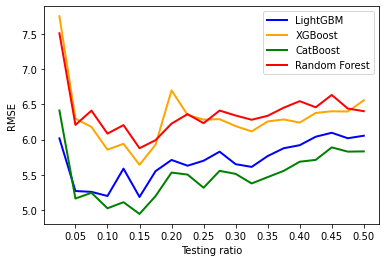

In [66]:
plt.plot(ratio, list17, lw=2, c='blue', label='LightGBM')
plt.plot(ratio, list19, lw=2, c='orange', label='XGBoost')
plt.plot(ratio, list21, lw=2, c='green', label='CatBoost')
plt.plot(ratio, list23, lw=2, c='red', label='Random Forest')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('RMSE')
plt.legend(loc=1)
plt.show()

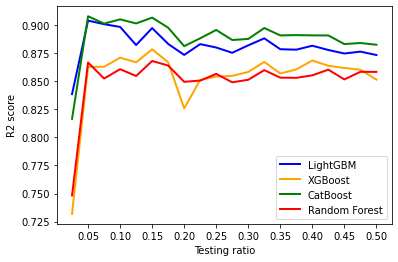

In [67]:
plt.plot(ratio, list18,  lw=2, c='blue', label='LightGBM')
plt.plot(ratio, list20, lw=2, c='orange', label='XGBoost')
plt.plot(ratio, list22, lw=2, c='green', label='CatBoost')
plt.plot(ratio, list24, lw=2, c='red', label='Random Forest')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('R2 score')
plt.legend()
plt.show()

In [17]:
# import methods
lgbm = LGBMRegressor()
xgb = XGBRegressor()
cat = CatBoostRegressor()
rdf = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data 
lgbm.fit(X_train, y_train) 
xgb.fit(X_train, y_train) 
cat.fit(X_train, y_train) 
rdf.fit(X_train, y_train)

# training and testing with different models and different categorical feature handling methods
y_pred_lgbm=lgbm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_cat = cat.predict(X_test)
y_pred_rdf = rdf.predict(X_test)
    
print("Model           RMSE      R2") 
print("LightGBM       {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lgbm)), r2_score(y_test, y_pred_lgbm))) 
print("XGBoost        {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_xgb)), r2_score(y_test, y_pred_xgb)))
print("CatBoost       {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_cat)), r2_score(y_test, y_pred_cat)))
print("Random Forest  {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_rdf)), r2_score(y_test, y_pred_rdf)))

Learning rate set to 0.040088
0:	learn: 16.3623756	total: 1.11ms	remaining: 1.11s
1:	learn: 16.0134922	total: 2.08ms	remaining: 1.04s
2:	learn: 15.6842266	total: 3.08ms	remaining: 1.02s
3:	learn: 15.3208822	total: 4.17ms	remaining: 1.04s
4:	learn: 14.9659246	total: 5.16ms	remaining: 1.03s
5:	learn: 14.6336253	total: 6.28ms	remaining: 1.04s
6:	learn: 14.3062310	total: 7.27ms	remaining: 1.03s
7:	learn: 13.9757038	total: 8.24ms	remaining: 1.02s
8:	learn: 13.6959947	total: 9.22ms	remaining: 1.01s
9:	learn: 13.3763364	total: 10.2ms	remaining: 1.01s
10:	learn: 13.0838536	total: 11.3ms	remaining: 1.01s
11:	learn: 12.8027983	total: 12.2ms	remaining: 1s
12:	learn: 12.5445428	total: 13.2ms	remaining: 999ms
13:	learn: 12.2884001	total: 14.1ms	remaining: 994ms
14:	learn: 12.0311111	total: 15.1ms	remaining: 990ms
15:	learn: 11.7984688	total: 16ms	remaining: 987ms
16:	learn: 11.5647141	total: 17ms	remaining: 984ms
17:	learn: 11.3516641	total: 18ms	remaining: 981ms
18:	learn: 11.1417525	total: 19ms	r

180:	learn: 4.7222749	total: 165ms	remaining: 747ms
181:	learn: 4.7180734	total: 166ms	remaining: 746ms
182:	learn: 4.7167849	total: 167ms	remaining: 743ms
183:	learn: 4.7102117	total: 167ms	remaining: 742ms
184:	learn: 4.7041017	total: 168ms	remaining: 741ms
185:	learn: 4.6971548	total: 170ms	remaining: 743ms
186:	learn: 4.6902707	total: 171ms	remaining: 742ms
187:	learn: 4.6848984	total: 172ms	remaining: 741ms
188:	learn: 4.6780676	total: 172ms	remaining: 740ms
189:	learn: 4.6696555	total: 173ms	remaining: 738ms
190:	learn: 4.6608088	total: 174ms	remaining: 737ms
191:	learn: 4.6476447	total: 177ms	remaining: 744ms
192:	learn: 4.6390818	total: 178ms	remaining: 744ms
193:	learn: 4.6323921	total: 179ms	remaining: 743ms
194:	learn: 4.6223539	total: 180ms	remaining: 742ms
195:	learn: 4.6165400	total: 181ms	remaining: 741ms
196:	learn: 4.6108610	total: 182ms	remaining: 741ms
197:	learn: 4.6019214	total: 183ms	remaining: 740ms
198:	learn: 4.5980712	total: 184ms	remaining: 739ms
199:	learn: 

379:	learn: 3.8581426	total: 337ms	remaining: 550ms
380:	learn: 3.8543503	total: 338ms	remaining: 549ms
381:	learn: 3.8516926	total: 339ms	remaining: 548ms
382:	learn: 3.8499388	total: 340ms	remaining: 547ms
383:	learn: 3.8460651	total: 341ms	remaining: 546ms
384:	learn: 3.8428262	total: 341ms	remaining: 545ms
385:	learn: 3.8372699	total: 342ms	remaining: 545ms
386:	learn: 3.8347292	total: 343ms	remaining: 544ms
387:	learn: 3.8299335	total: 344ms	remaining: 543ms
388:	learn: 3.8276764	total: 345ms	remaining: 542ms
389:	learn: 3.8258422	total: 346ms	remaining: 541ms
390:	learn: 3.8221901	total: 347ms	remaining: 540ms
391:	learn: 3.8182277	total: 348ms	remaining: 539ms
392:	learn: 3.8156538	total: 349ms	remaining: 538ms
393:	learn: 3.8123401	total: 349ms	remaining: 537ms
394:	learn: 3.8102094	total: 350ms	remaining: 536ms
395:	learn: 3.8077606	total: 351ms	remaining: 535ms
396:	learn: 3.8047081	total: 352ms	remaining: 535ms
397:	learn: 3.8015908	total: 353ms	remaining: 534ms
398:	learn: 

584:	learn: 3.4200614	total: 509ms	remaining: 361ms
585:	learn: 3.4192025	total: 510ms	remaining: 360ms
586:	learn: 3.4181327	total: 510ms	remaining: 359ms
587:	learn: 3.4173829	total: 511ms	remaining: 358ms
588:	learn: 3.4147053	total: 512ms	remaining: 357ms
589:	learn: 3.4128081	total: 513ms	remaining: 357ms
590:	learn: 3.4120566	total: 514ms	remaining: 356ms
591:	learn: 3.4112099	total: 515ms	remaining: 355ms
592:	learn: 3.4104517	total: 516ms	remaining: 354ms
593:	learn: 3.4087870	total: 517ms	remaining: 353ms
594:	learn: 3.4080671	total: 517ms	remaining: 352ms
595:	learn: 3.4068555	total: 518ms	remaining: 351ms
596:	learn: 3.4052386	total: 519ms	remaining: 350ms
597:	learn: 3.4044567	total: 520ms	remaining: 350ms
598:	learn: 3.4035680	total: 521ms	remaining: 349ms
599:	learn: 3.4015372	total: 522ms	remaining: 348ms
600:	learn: 3.4001090	total: 523ms	remaining: 347ms
601:	learn: 3.3994853	total: 524ms	remaining: 346ms
602:	learn: 3.3971041	total: 524ms	remaining: 345ms
603:	learn: 

781:	learn: 3.1947376	total: 681ms	remaining: 190ms
782:	learn: 3.1944826	total: 681ms	remaining: 189ms
783:	learn: 3.1931760	total: 682ms	remaining: 188ms
784:	learn: 3.1924649	total: 683ms	remaining: 187ms
785:	learn: 3.1911291	total: 684ms	remaining: 186ms
786:	learn: 3.1900393	total: 685ms	remaining: 185ms
787:	learn: 3.1883447	total: 686ms	remaining: 185ms
788:	learn: 3.1873829	total: 687ms	remaining: 184ms
789:	learn: 3.1861398	total: 688ms	remaining: 183ms
790:	learn: 3.1852168	total: 689ms	remaining: 182ms
791:	learn: 3.1845656	total: 690ms	remaining: 181ms
792:	learn: 3.1838944	total: 690ms	remaining: 180ms
793:	learn: 3.1831908	total: 691ms	remaining: 179ms
794:	learn: 3.1828545	total: 692ms	remaining: 178ms
795:	learn: 3.1822082	total: 693ms	remaining: 178ms
796:	learn: 3.1815888	total: 694ms	remaining: 177ms
797:	learn: 3.1812622	total: 695ms	remaining: 176ms
798:	learn: 3.1796496	total: 696ms	remaining: 175ms
799:	learn: 3.1792622	total: 696ms	remaining: 174ms
800:	learn: 

984:	learn: 3.0510377	total: 852ms	remaining: 13ms
985:	learn: 3.0506394	total: 853ms	remaining: 12.1ms
986:	learn: 3.0504248	total: 854ms	remaining: 11.3ms
987:	learn: 3.0500349	total: 855ms	remaining: 10.4ms
988:	learn: 3.0496382	total: 856ms	remaining: 9.52ms
989:	learn: 3.0491900	total: 857ms	remaining: 8.65ms
990:	learn: 3.0486952	total: 858ms	remaining: 7.79ms
991:	learn: 3.0486490	total: 859ms	remaining: 6.92ms
992:	learn: 3.0483678	total: 859ms	remaining: 6.06ms
993:	learn: 3.0478325	total: 860ms	remaining: 5.19ms
994:	learn: 3.0471735	total: 861ms	remaining: 4.33ms
995:	learn: 3.0466577	total: 862ms	remaining: 3.46ms
996:	learn: 3.0459916	total: 863ms	remaining: 2.6ms
997:	learn: 3.0458216	total: 864ms	remaining: 1.73ms
998:	learn: 3.0453943	total: 865ms	remaining: 865us
999:	learn: 3.0446767	total: 866ms	remaining: 0us
Model           RMSE      R2
LightGBM       5.1843   0.8974
XGBoost        5.6419   0.8784
CatBoost       4.9433   0.9067
Random Forest  5.8895   0.8675


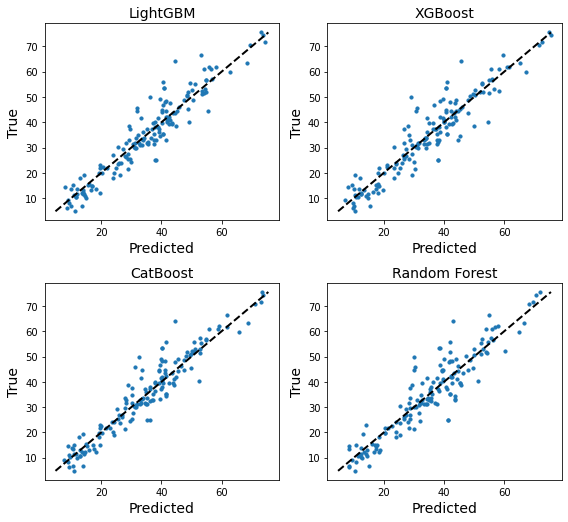

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_lgbm, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("LightGBM", fontsize = 14) 

ax2.scatter(y_pred_xgb, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("XGBoost", fontsize = 14) 

ax3.scatter(y_pred_cat, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("CatBoost", fontsize = 14) 

ax4.scatter(y_pred_rdf, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("Random Forest", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

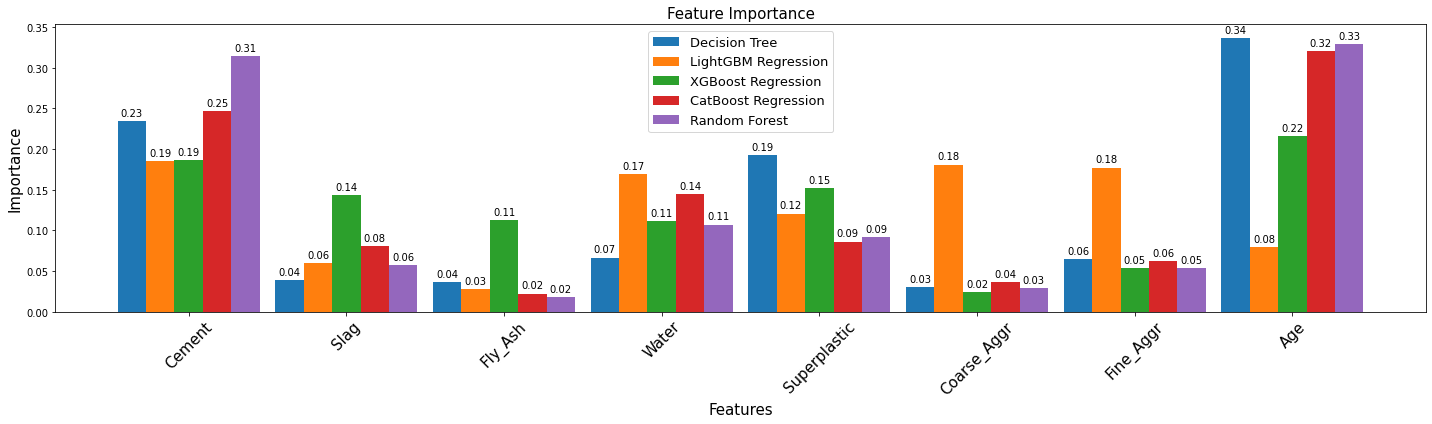

In [86]:
feature_dtr = dtr.feature_importances_ 
feature_lgbm = lgbm.feature_importances_
feature_xgb = xgb.feature_importances_ 
feature_cat = cat.feature_importances_
feature_rdf = rdf.feature_importances_ 

feature_lgbm = feature_lgbm/sum(feature_lgbm)
feature_cat = feature_cat/sum(feature_cat)

labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.18
fig, ax = plt.subplots(figsize=(20,6)) 
rects1 = ax.bar(x-2*(width), feature_dtr, width, label='Decision Tree') 
rects2 = ax.bar(x-1*(width), feature_lgbm,width, label='LightGBM Regression') 
rects3 = ax.bar(x          , feature_xgb, width, label='XGBoost Regression') 
rects4 = ax.bar(x+1*(width), feature_cat, width, label='CatBoost Regression') 
rects5 = ax.bar(x+2*(width), feature_rdf, width, label='Random Forest') 

ax.set_ylabel('Importance', fontsize = 15) 
ax.set_xlabel('Features', fontsize = 15) 
ax.set_title('Feature Importance', fontsize = 15) 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45, fontsize = 15) 
ax.legend(loc=9, fontsize = 13) 
autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3) 
autolabel(rects4) 
autolabel(rects5) 
fig.tight_layout() 
plt.show()